In [4]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=32)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))

Using TensorFlow backend.


Epoch 1/5
60000/60000 [==============================] - ETA: 0s - loss: 0.6878 - acc: 0.8239
Epoch 2/5
60000/60000 [==============================] - ETA: 0s - loss: 0.3508 - acc: 0.9017
Epoch 3/5
60000/60000 [==============================] - ETA: 0s - loss: 0.3016 - acc: 0.9143
Epoch 4/5
60000/60000 [==============================] - ETA: 0s - loss: 0.2711 - acc: 0.9232
Epoch 5/5
10000/10000 [==============================] - ETA: 0s
loss_and_metrics : [0.23114196219146252, 0.93359999999999999]


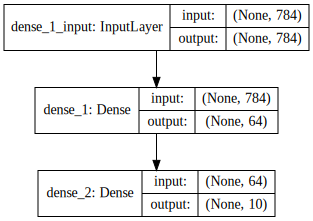

In [2]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [3]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')

In [5]:
(X_val, Y_val) = (X_test, Y_test)
hist = model.fit(X_train, Y_train, epochs=10, batch_size=10, validation_data=(X_val, Y_val))

print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - ETA: 0s - loss: 0.2208 - acc: 0.9375 - val_loss: 0.1885 - val_acc: 0.9454
Epoch 2/10
60000/60000 [==============================] - ETA: 0s - loss: 0.1822 - acc: 0.9483 - val_loss: 0.1676 - val_acc: 0.9505
Epoch 3/10
60000/60000 [==============================] - ETA: 0s - loss: 0.1564 - acc: 0.9555 - val_loss: 0.1488 - val_acc: 0.9559
Epoch 4/10
60000/60000 [==============================] - ETA: 0s - loss: 0.1372 - acc: 0.9614 - val_loss: 0.1361 - val_acc: 0.9601
Epoch 5/10
60000/60000 [==============================] - ETA: 0s - loss: 0.1234 - acc: 0.9650 - val_loss: 0.1260 - val_acc: 0.9627
Epoch 6/10
60000/60000 [==============================] - ETA: 0s - loss: 0.1125 - acc: 0.9685 - val_loss: 0.1157 - val_acc: 0.9652
Epoch 7/10
60000/60000 [==============================] - ETA: 0s - loss: 0.1029 - acc: 0.9708 - val_loss: 0.1169 - val_acc: 0.9650
Epoch 8/10
60000/60000 [==

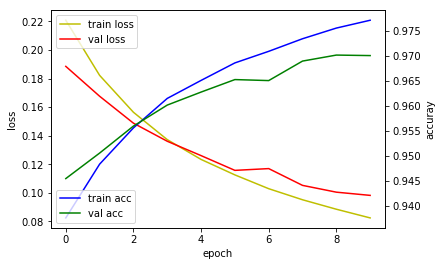

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - ETA: 0s - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - ETA: 0s - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - ETA: 0s - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - ETA: 0s - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - ETA: 0s - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - ETA: 0s - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - ETA: 0s - loss: 2.0719 - acc: 0.2086 - val_loss: 2.0727 - val_acc: 0.2067
Epoch 8/1000
700/700 [======================

700/700 [==============================] - ETA: 0s - loss: 1.7501 - acc: 0.2800 - val_loss: 1.8305 - val_acc: 0.2000
Epoch 64/1000
700/700 [==============================] - ETA: 0s - loss: 1.7480 - acc: 0.2800 - val_loss: 1.8279 - val_acc: 0.2167
Epoch 65/1000
700/700 [==============================] - ETA: 0s - loss: 1.7455 - acc: 0.2843 - val_loss: 1.8307 - val_acc: 0.2000
Epoch 66/1000
700/700 [==============================] - ETA: 0s - loss: 1.7436 - acc: 0.2800 - val_loss: 1.8306 - val_acc: 0.2067
Epoch 67/1000
700/700 [==============================] - ETA: 0s - loss: 1.7417 - acc: 0.2671 - val_loss: 1.8301 - val_acc: 0.2033
Epoch 68/1000
700/700 [==============================] - ETA: 0s - loss: 1.7402 - acc: 0.2757 - val_loss: 1.8249 - val_acc: 0.2000
Epoch 69/1000
700/700 [==============================] - ETA: 0s - loss: 1.7373 - acc: 0.2829 - val_loss: 1.8310 - val_acc: 0.2167
Epoch 70/1000
700/700 [==============================] - ETA: 0s - loss: 1.7354 - acc: 0.2857 - v

700/700 [==============================] - ETA: 0s - loss: 1.6590 - acc: 0.3157 - val_loss: 1.8284 - val_acc: 0.2367
Epoch 126/1000
700/700 [==============================] - ETA: 0s - loss: 1.6572 - acc: 0.3186 - val_loss: 1.8288 - val_acc: 0.2267
Epoch 127/1000
700/700 [==============================] - ETA: 0s - loss: 1.6564 - acc: 0.3171 - val_loss: 1.8174 - val_acc: 0.2433
Epoch 128/1000
700/700 [==============================] - ETA: 0s - loss: 1.6545 - acc: 0.3357 - val_loss: 1.8320 - val_acc: 0.2200
Epoch 129/1000
700/700 [==============================] - ETA: 0s - loss: 1.6548 - acc: 0.3129 - val_loss: 1.8262 - val_acc: 0.2233
Epoch 130/1000
700/700 [==============================] - ETA: 0s - loss: 1.6527 - acc: 0.3257 - val_loss: 1.8173 - val_acc: 0.2567
Epoch 131/1000
700/700 [==============================] - ETA: 0s - loss: 1.6523 - acc: 0.3229 - val_loss: 1.8279 - val_acc: 0.2533
Epoch 132/1000
700/700 [==============================] - ETA: 0s - loss: 1.6521 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.6056 - acc: 0.3543 - val_loss: 1.8455 - val_acc: 0.2200
Epoch 188/1000
700/700 [==============================] - ETA: 0s - loss: 1.6065 - acc: 0.3414 - val_loss: 1.8428 - val_acc: 0.2200
Epoch 189/1000
700/700 [==============================] - ETA: 0s - loss: 1.6037 - acc: 0.3529 - val_loss: 1.8553 - val_acc: 0.2200
Epoch 190/1000
700/700 [==============================] - ETA: 0s - loss: 1.6057 - acc: 0.3314 - val_loss: 1.8422 - val_acc: 0.2333
Epoch 191/1000
700/700 [==============================] - ETA: 0s - loss: 1.6032 - acc: 0.3571 - val_loss: 1.8622 - val_acc: 0.2233
Epoch 192/1000
700/700 [==============================] - ETA: 0s - loss: 1.6035 - acc: 0.3471 - val_loss: 1.8539 - val_acc: 0.2200
Epoch 193/1000
700/700 [==============================] - ETA: 0s - loss: 1.6021 - acc: 0.3443 - val_loss: 1.8578 - val_acc: 0.2300
Epoch 194/1000
700/700 [==============================] - ETA: 0s - loss: 1.6016 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.5708 - acc: 0.3471 - val_loss: 1.8868 - val_acc: 0.2267
Epoch 250/1000
700/700 [==============================] - ETA: 0s - loss: 1.5675 - acc: 0.3643 - val_loss: 1.9023 - val_acc: 0.2167
Epoch 251/1000
700/700 [==============================] - ETA: 0s - loss: 1.5699 - acc: 0.3471 - val_loss: 1.8839 - val_acc: 0.2300
Epoch 252/1000
700/700 [==============================] - ETA: 0s - loss: 1.5677 - acc: 0.3657 - val_loss: 1.8803 - val_acc: 0.2267
Epoch 253/1000
700/700 [==============================] - ETA: 0s - loss: 1.5684 - acc: 0.3543 - val_loss: 1.8864 - val_acc: 0.2167
Epoch 254/1000
700/700 [==============================] - ETA: 0s - loss: 1.5674 - acc: 0.3557 - val_loss: 1.8861 - val_acc: 0.2267
Epoch 255/1000
700/700 [==============================] - ETA: 0s - loss: 1.5677 - acc: 0.3457 - val_loss: 1.8744 - val_acc: 0.2300
Epoch 256/1000
700/700 [==============================] - ETA: 0s - loss: 1.5653 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.5423 - acc: 0.3600 - val_loss: 1.9091 - val_acc: 0.2300
Epoch 312/1000
700/700 [==============================] - ETA: 0s - loss: 1.5419 - acc: 0.3729 - val_loss: 1.9359 - val_acc: 0.2333
Epoch 313/1000
700/700 [==============================] - ETA: 0s - loss: 1.5383 - acc: 0.3714 - val_loss: 1.9112 - val_acc: 0.2567
Epoch 314/1000
700/700 [==============================] - ETA: 0s - loss: 1.5428 - acc: 0.3686 - val_loss: 1.9198 - val_acc: 0.2300
Epoch 315/1000
700/700 [==============================] - ETA: 0s - loss: 1.5401 - acc: 0.3657 - val_loss: 1.9171 - val_acc: 0.2233
Epoch 316/1000
700/700 [==============================] - ETA: 0s - loss: 1.5401 - acc: 0.3643 - val_loss: 1.9198 - val_acc: 0.2267
Epoch 317/1000
700/700 [==============================] - ETA: 0s - loss: 1.5408 - acc: 0.3600 - val_loss: 1.9277 - val_acc: 0.2333
Epoch 318/1000
700/700 [==============================] - ETA: 0s - loss: 1.5404 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.5188 - acc: 0.3743 - val_loss: 1.9600 - val_acc: 0.2167
Epoch 374/1000
700/700 [==============================] - ETA: 0s - loss: 1.5179 - acc: 0.3657 - val_loss: 1.9539 - val_acc: 0.2300
Epoch 375/1000
700/700 [==============================] - ETA: 0s - loss: 1.5165 - acc: 0.3843 - val_loss: 1.9440 - val_acc: 0.2267
Epoch 376/1000
700/700 [==============================] - ETA: 0s - loss: 1.5165 - acc: 0.3771 - val_loss: 1.9570 - val_acc: 0.2200
Epoch 377/1000
700/700 [==============================] - ETA: 0s - loss: 1.5157 - acc: 0.3729 - val_loss: 1.9742 - val_acc: 0.2233
Epoch 378/1000
700/700 [==============================] - ETA: 0s - loss: 1.5162 - acc: 0.3743 - val_loss: 1.9813 - val_acc: 0.2333
Epoch 379/1000
700/700 [==============================] - ETA: 0s - loss: 1.5170 - acc: 0.3700 - val_loss: 1.9542 - val_acc: 0.2400
Epoch 380/1000
700/700 [==============================] - ETA: 0s - loss: 1.5145 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.4966 - acc: 0.3929 - val_loss: 1.9850 - val_acc: 0.2333
Epoch 436/1000
700/700 [==============================] - ETA: 0s - loss: 1.4980 - acc: 0.3871 - val_loss: 1.9688 - val_acc: 0.2267
Epoch 437/1000
700/700 [==============================] - ETA: 0s - loss: 1.4965 - acc: 0.3900 - val_loss: 1.9875 - val_acc: 0.2300
Epoch 438/1000
700/700 [==============================] - ETA: 0s - loss: 1.4957 - acc: 0.3914 - val_loss: 1.9655 - val_acc: 0.2300
Epoch 439/1000
700/700 [==============================] - ETA: 0s - loss: 1.4955 - acc: 0.3786 - val_loss: 1.9810 - val_acc: 0.2233
Epoch 440/1000
700/700 [==============================] - ETA: 0s - loss: 1.4967 - acc: 0.3800 - val_loss: 1.9787 - val_acc: 0.2300
Epoch 441/1000
700/700 [==============================] - ETA: 0s - loss: 1.4959 - acc: 0.3886 - val_loss: 1.9830 - val_acc: 0.2267
Epoch 442/1000
700/700 [==============================] - ETA: 0s - loss: 1.4955 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.4793 - acc: 0.3900 - val_loss: 2.0080 - val_acc: 0.2467
Epoch 498/1000
700/700 [==============================] - ETA: 0s - loss: 1.4789 - acc: 0.3829 - val_loss: 2.0401 - val_acc: 0.2333
Epoch 499/1000
700/700 [==============================] - ETA: 0s - loss: 1.4797 - acc: 0.3986 - val_loss: 2.0209 - val_acc: 0.2367
Epoch 500/1000
700/700 [==============================] - ETA: 0s - loss: 1.4803 - acc: 0.3929 - val_loss: 2.0186 - val_acc: 0.2367
Epoch 501/1000
700/700 [==============================] - ETA: 0s - loss: 1.4802 - acc: 0.3957 - val_loss: 2.0268 - val_acc: 0.2333
Epoch 502/1000
700/700 [==============================] - ETA: 0s - loss: 1.4783 - acc: 0.3886 - val_loss: 2.0152 - val_acc: 0.2267
Epoch 503/1000
700/700 [==============================] - ETA: 0s - loss: 1.4788 - acc: 0.4000 - val_loss: 2.0164 - val_acc: 0.2267
Epoch 504/1000
700/700 [==============================] - ETA: 0s - loss: 1.4781 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.4645 - acc: 0.4043 - val_loss: 2.0338 - val_acc: 0.2500
Epoch 560/1000
700/700 [==============================] - ETA: 0s - loss: 1.4646 - acc: 0.4043 - val_loss: 2.0381 - val_acc: 0.2567
Epoch 561/1000
700/700 [==============================] - ETA: 0s - loss: 1.4656 - acc: 0.3971 - val_loss: 2.0294 - val_acc: 0.2300
Epoch 562/1000
700/700 [==============================] - ETA: 0s - loss: 1.4652 - acc: 0.3986 - val_loss: 2.0285 - val_acc: 0.2233
Epoch 563/1000
700/700 [==============================] - ETA: 0s - loss: 1.4645 - acc: 0.3943 - val_loss: 2.0287 - val_acc: 0.2267
Epoch 564/1000
700/700 [==============================] - ETA: 0s - loss: 1.4643 - acc: 0.4086 - val_loss: 2.0459 - val_acc: 0.2267
Epoch 565/1000
700/700 [==============================] - ETA: 0s - loss: 1.4638 - acc: 0.3971 - val_loss: 2.0321 - val_acc: 0.2333
Epoch 566/1000
700/700 [==============================] - ETA: 0s - loss: 1.4655 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4525 - acc: 0.4143 - val_loss: 2.0658 - val_acc: 0.2333
Epoch 622/1000
700/700 [==============================] - ETA: 0s - loss: 1.4516 - acc: 0.4086 - val_loss: 2.0651 - val_acc: 0.2367
Epoch 623/1000
700/700 [==============================] - ETA: 0s - loss: 1.4507 - acc: 0.4143 - val_loss: 2.0704 - val_acc: 0.2300
Epoch 624/1000
700/700 [==============================] - ETA: 0s - loss: 1.4519 - acc: 0.4114 - val_loss: 2.0634 - val_acc: 0.2333
Epoch 625/1000
700/700 [==============================] - ETA: 0s - loss: 1.4517 - acc: 0.4043 - val_loss: 2.0651 - val_acc: 0.2433
Epoch 626/1000
700/700 [==============================] - ETA: 0s - loss: 1.4508 - acc: 0.4014 - val_loss: 2.0456 - val_acc: 0.2333
Epoch 627/1000
700/700 [==============================] - ETA: 0s - loss: 1.4516 - acc: 0.4186 - val_loss: 2.0544 - val_acc: 0.2333
Epoch 628/1000
700/700 [==============================] - ETA: 0s - loss: 1.4497 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4401 - acc: 0.4057 - val_loss: 2.0673 - val_acc: 0.2500
Epoch 684/1000
700/700 [==============================] - ETA: 0s - loss: 1.4368 - acc: 0.4129 - val_loss: 2.0809 - val_acc: 0.2567
Epoch 685/1000
700/700 [==============================] - ETA: 0s - loss: 1.4398 - acc: 0.4100 - val_loss: 2.0741 - val_acc: 0.2467
Epoch 686/1000
700/700 [==============================] - ETA: 0s - loss: 1.4396 - acc: 0.4129 - val_loss: 2.0972 - val_acc: 0.2500
Epoch 687/1000
700/700 [==============================] - ETA: 0s - loss: 1.4393 - acc: 0.4143 - val_loss: 2.0703 - val_acc: 0.2367
Epoch 688/1000
700/700 [==============================] - ETA: 0s - loss: 1.4401 - acc: 0.4157 - val_loss: 2.0801 - val_acc: 0.2333
Epoch 689/1000
700/700 [==============================] - ETA: 0s - loss: 1.4392 - acc: 0.4129 - val_loss: 2.0830 - val_acc: 0.2433
Epoch 690/1000
700/700 [==============================] - ETA: 0s - loss: 1.4389 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4264 - acc: 0.4314 - val_loss: 2.1076 - val_acc: 0.2600
Epoch 746/1000
700/700 [==============================] - ETA: 0s - loss: 1.4294 - acc: 0.4257 - val_loss: 2.1024 - val_acc: 0.2367
Epoch 747/1000
700/700 [==============================] - ETA: 0s - loss: 1.4291 - acc: 0.4200 - val_loss: 2.1139 - val_acc: 0.2467
Epoch 748/1000
700/700 [==============================] - ETA: 0s - loss: 1.4271 - acc: 0.4186 - val_loss: 2.1171 - val_acc: 0.2567
Epoch 749/1000
700/700 [==============================] - ETA: 0s - loss: 1.4259 - acc: 0.4214 - val_loss: 2.0876 - val_acc: 0.2367
Epoch 750/1000
700/700 [==============================] - ETA: 0s - loss: 1.4281 - acc: 0.4286 - val_loss: 2.0931 - val_acc: 0.2367
Epoch 751/1000
700/700 [==============================] - ETA: 0s - loss: 1.4266 - acc: 0.4171 - val_loss: 2.1053 - val_acc: 0.2400
Epoch 752/1000
700/700 [==============================] - ETA: 0s - loss: 1.4274 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4188 - acc: 0.4314 - val_loss: 2.1217 - val_acc: 0.2400
Epoch 808/1000
700/700 [==============================] - ETA: 0s - loss: 1.4181 - acc: 0.4214 - val_loss: 2.1173 - val_acc: 0.2433
Epoch 809/1000
700/700 [==============================] - ETA: 0s - loss: 1.4189 - acc: 0.4214 - val_loss: 2.1297 - val_acc: 0.2467
Epoch 810/1000
700/700 [==============================] - ETA: 0s - loss: 1.4176 - acc: 0.4314 - val_loss: 2.1293 - val_acc: 0.2433
Epoch 811/1000
700/700 [==============================] - ETA: 0s - loss: 1.4179 - acc: 0.4300 - val_loss: 2.1247 - val_acc: 0.2467
Epoch 812/1000
700/700 [==============================] - ETA: 0s - loss: 1.4178 - acc: 0.4243 - val_loss: 2.1166 - val_acc: 0.2400
Epoch 813/1000
700/700 [==============================] - ETA: 0s - loss: 1.4179 - acc: 0.4329 - val_loss: 2.1310 - val_acc: 0.2367
Epoch 814/1000
700/700 [==============================] - ETA: 0s - loss: 1.4166 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4088 - acc: 0.4329 - val_loss: 2.1464 - val_acc: 0.2433
Epoch 870/1000
700/700 [==============================] - ETA: 0s - loss: 1.4071 - acc: 0.4343 - val_loss: 2.1586 - val_acc: 0.2467
Epoch 871/1000
700/700 [==============================] - ETA: 0s - loss: 1.4086 - acc: 0.4300 - val_loss: 2.1658 - val_acc: 0.2433
Epoch 872/1000
700/700 [==============================] - ETA: 0s - loss: 1.4077 - acc: 0.4329 - val_loss: 2.1470 - val_acc: 0.2600
Epoch 873/1000
700/700 [==============================] - ETA: 0s - loss: 1.4079 - acc: 0.4286 - val_loss: 2.1412 - val_acc: 0.2467
Epoch 874/1000
700/700 [==============================] - ETA: 0s - loss: 1.4082 - acc: 0.4271 - val_loss: 2.1410 - val_acc: 0.2433
Epoch 875/1000
700/700 [==============================] - ETA: 0s - loss: 1.4072 - acc: 0.4329 - val_loss: 2.1593 - val_acc: 0.2467
Epoch 876/1000
700/700 [==============================] - ETA: 0s - loss: 1.4076 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4006 - acc: 0.4357 - val_loss: 2.1657 - val_acc: 0.2433
Epoch 932/1000
700/700 [==============================] - ETA: 0s - loss: 1.4001 - acc: 0.4414 - val_loss: 2.1566 - val_acc: 0.2500
Epoch 933/1000
700/700 [==============================] - ETA: 0s - loss: 1.4005 - acc: 0.4300 - val_loss: 2.1691 - val_acc: 0.2500
Epoch 934/1000
700/700 [==============================] - ETA: 0s - loss: 1.3997 - acc: 0.4386 - val_loss: 2.1735 - val_acc: 0.2533
Epoch 935/1000
700/700 [==============================] - ETA: 0s - loss: 1.4007 - acc: 0.4371 - val_loss: 2.1726 - val_acc: 0.2500
Epoch 936/1000
700/700 [==============================] - ETA: 0s - loss: 1.4002 - acc: 0.4400 - val_loss: 2.1797 - val_acc: 0.2567
Epoch 937/1000
700/700 [==============================] - ETA: 0s - loss: 1.3999 - acc: 0.4314 - val_loss: 2.1733 - val_acc: 0.2433
Epoch 938/1000
700/700 [==============================] - ETA: 0s - loss: 1.3991 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.3924 - acc: 0.4500 - val_loss: 2.1931 - val_acc: 0.2433
Epoch 994/1000
700/700 [==============================] - ETA: 0s - loss: 1.3922 - acc: 0.4343 - val_loss: 2.1745 - val_acc: 0.2333
Epoch 995/1000
700/700 [==============================] - ETA: 0s - loss: 1.3930 - acc: 0.4386 - val_loss: 2.1976 - val_acc: 0.2467
Epoch 996/1000
700/700 [==============================] - ETA: 0s - loss: 1.3917 - acc: 0.4429 - val_loss: 2.1987 - val_acc: 0.2400
Epoch 997/1000
700/700 [==============================] - ETA: 0s - loss: 1.3916 - acc: 0.4443 - val_loss: 2.1984 - val_acc: 0.2500
Epoch 998/1000
700/700 [==============================] - ETA: 0s - loss: 1.3922 - acc: 0.4443 - val_loss: 2.2108 - val_acc: 0.2500
Epoch 999/1000
700/700 [==============================] - ETA: 0s - loss: 1.3921 - acc: 0.4386 - val_loss: 2.1951 - val_acc: 0.2467
Epoch 1000/1000
700/700 [==============================] - ETA: 0s - loss: 1.3918 - acc: 0.

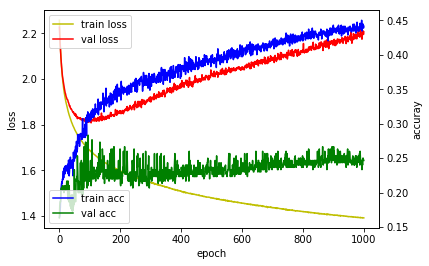

In [11]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [13]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[tb_hist])

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - ETA: 0s - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - ETA: 0s - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - ETA: 0s - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - ETA: 0s - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - ETA: 0s - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - ETA: 0s - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - ETA: 0s - loss: 2.0719 - acc: 0.2086 - val_loss: 2.0727 - val_acc: 0.2067
Epoch 8/1000
700/700 [======================

700/700 [==============================] - ETA: 0s - loss: 1.7501 - acc: 0.2800 - val_loss: 1.8305 - val_acc: 0.2000
Epoch 64/1000
700/700 [==============================] - ETA: 0s - loss: 1.7481 - acc: 0.2800 - val_loss: 1.8280 - val_acc: 0.2167
Epoch 65/1000
700/700 [==============================] - ETA: 0s - loss: 1.7455 - acc: 0.2843 - val_loss: 1.8307 - val_acc: 0.2000
Epoch 66/1000
700/700 [==============================] - ETA: 0s - loss: 1.7436 - acc: 0.2800 - val_loss: 1.8306 - val_acc: 0.2067
Epoch 67/1000
700/700 [==============================] - ETA: 0s - loss: 1.7417 - acc: 0.2671 - val_loss: 1.8301 - val_acc: 0.2033
Epoch 68/1000
700/700 [==============================] - ETA: 0s - loss: 1.7401 - acc: 0.2757 - val_loss: 1.8244 - val_acc: 0.2000
Epoch 69/1000
700/700 [==============================] - ETA: 0s - loss: 1.7373 - acc: 0.2843 - val_loss: 1.8291 - val_acc: 0.2167
Epoch 70/1000
700/700 [==============================] - ETA: 0s - loss: 1.7353 - acc: 0.2843 - v

700/700 [==============================] - ETA: 0s - loss: 1.6591 - acc: 0.3157 - val_loss: 1.8290 - val_acc: 0.2367
Epoch 126/1000
700/700 [==============================] - ETA: 0s - loss: 1.6573 - acc: 0.3186 - val_loss: 1.8291 - val_acc: 0.2267
Epoch 127/1000
700/700 [==============================] - ETA: 0s - loss: 1.6565 - acc: 0.3171 - val_loss: 1.8171 - val_acc: 0.2433
Epoch 128/1000
700/700 [==============================] - ETA: 0s - loss: 1.6546 - acc: 0.3357 - val_loss: 1.8327 - val_acc: 0.2233
Epoch 129/1000
700/700 [==============================] - ETA: 0s - loss: 1.6550 - acc: 0.3143 - val_loss: 1.8267 - val_acc: 0.2233
Epoch 130/1000
700/700 [==============================] - ETA: 0s - loss: 1.6528 - acc: 0.3271 - val_loss: 1.8176 - val_acc: 0.2567
Epoch 131/1000
700/700 [==============================] - ETA: 0s - loss: 1.6524 - acc: 0.3229 - val_loss: 1.8281 - val_acc: 0.2533
Epoch 132/1000
700/700 [==============================] - ETA: 0s - loss: 1.6522 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.6057 - acc: 0.3543 - val_loss: 1.8476 - val_acc: 0.2200
Epoch 188/1000
700/700 [==============================] - ETA: 0s - loss: 1.6066 - acc: 0.3400 - val_loss: 1.8436 - val_acc: 0.2200
Epoch 189/1000
700/700 [==============================] - ETA: 0s - loss: 1.6037 - acc: 0.3543 - val_loss: 1.8559 - val_acc: 0.2200
Epoch 190/1000
700/700 [==============================] - ETA: 0s - loss: 1.6057 - acc: 0.3314 - val_loss: 1.8426 - val_acc: 0.2300
Epoch 191/1000
700/700 [==============================] - ETA: 0s - loss: 1.6034 - acc: 0.3571 - val_loss: 1.8621 - val_acc: 0.2233
Epoch 192/1000
700/700 [==============================] - ETA: 0s - loss: 1.6037 - acc: 0.3486 - val_loss: 1.8528 - val_acc: 0.2233
Epoch 193/1000
700/700 [==============================] - ETA: 0s - loss: 1.6021 - acc: 0.3429 - val_loss: 1.8571 - val_acc: 0.2300
Epoch 194/1000
700/700 [==============================] - ETA: 0s - loss: 1.6018 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.5708 - acc: 0.3471 - val_loss: 1.8870 - val_acc: 0.2267
Epoch 250/1000
700/700 [==============================] - ETA: 0s - loss: 1.5675 - acc: 0.3629 - val_loss: 1.9024 - val_acc: 0.2167
Epoch 251/1000
700/700 [==============================] - ETA: 0s - loss: 1.5699 - acc: 0.3471 - val_loss: 1.8845 - val_acc: 0.2333
Epoch 252/1000
700/700 [==============================] - ETA: 0s - loss: 1.5677 - acc: 0.3657 - val_loss: 1.8804 - val_acc: 0.2267
Epoch 253/1000
700/700 [==============================] - ETA: 0s - loss: 1.5685 - acc: 0.3543 - val_loss: 1.8866 - val_acc: 0.2167
Epoch 254/1000
700/700 [==============================] - ETA: 0s - loss: 1.5674 - acc: 0.3557 - val_loss: 1.8858 - val_acc: 0.2267
Epoch 255/1000
700/700 [==============================] - ETA: 0s - loss: 1.5677 - acc: 0.3471 - val_loss: 1.8745 - val_acc: 0.2300
Epoch 256/1000
700/700 [==============================] - ETA: 0s - loss: 1.5654 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.5423 - acc: 0.3600 - val_loss: 1.9111 - val_acc: 0.2300
Epoch 312/1000
700/700 [==============================] - ETA: 0s - loss: 1.5420 - acc: 0.3729 - val_loss: 1.9346 - val_acc: 0.2333
Epoch 313/1000
700/700 [==============================] - ETA: 0s - loss: 1.5384 - acc: 0.3714 - val_loss: 1.9118 - val_acc: 0.2567
Epoch 314/1000
700/700 [==============================] - ETA: 0s - loss: 1.5429 - acc: 0.3686 - val_loss: 1.9180 - val_acc: 0.2300
Epoch 315/1000
700/700 [==============================] - ETA: 0s - loss: 1.5401 - acc: 0.3657 - val_loss: 1.9165 - val_acc: 0.2233
Epoch 316/1000
700/700 [==============================] - ETA: 0s - loss: 1.5401 - acc: 0.3643 - val_loss: 1.9253 - val_acc: 0.2200
Epoch 317/1000
700/700 [==============================] - ETA: 0s - loss: 1.5409 - acc: 0.3571 - val_loss: 1.9289 - val_acc: 0.2333
Epoch 318/1000
700/700 [==============================] - ETA: 0s - loss: 1.5404 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.5181 - acc: 0.3714 - val_loss: 1.9596 - val_acc: 0.2200
Epoch 374/1000
700/700 [==============================] - ETA: 0s - loss: 1.5173 - acc: 0.3657 - val_loss: 1.9547 - val_acc: 0.2333
Epoch 375/1000
700/700 [==============================] - ETA: 0s - loss: 1.5158 - acc: 0.3857 - val_loss: 1.9442 - val_acc: 0.2267
Epoch 376/1000
700/700 [==============================] - ETA: 0s - loss: 1.5159 - acc: 0.3786 - val_loss: 1.9532 - val_acc: 0.2200
Epoch 377/1000
700/700 [==============================] - ETA: 0s - loss: 1.5150 - acc: 0.3729 - val_loss: 1.9741 - val_acc: 0.2233
Epoch 378/1000
700/700 [==============================] - ETA: 0s - loss: 1.5157 - acc: 0.3729 - val_loss: 1.9803 - val_acc: 0.2367
Epoch 379/1000
700/700 [==============================] - ETA: 0s - loss: 1.5165 - acc: 0.3686 - val_loss: 1.9545 - val_acc: 0.2400
Epoch 380/1000
700/700 [==============================] - ETA: 0s - loss: 1.5141 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.4964 - acc: 0.3943 - val_loss: 1.9864 - val_acc: 0.2367
Epoch 436/1000
700/700 [==============================] - ETA: 0s - loss: 1.4980 - acc: 0.3886 - val_loss: 1.9704 - val_acc: 0.2267
Epoch 437/1000
700/700 [==============================] - ETA: 0s - loss: 1.4964 - acc: 0.3943 - val_loss: 1.9879 - val_acc: 0.2300
Epoch 438/1000
700/700 [==============================] - ETA: 0s - loss: 1.4955 - acc: 0.3900 - val_loss: 1.9661 - val_acc: 0.2300
Epoch 439/1000
700/700 [==============================] - ETA: 0s - loss: 1.4953 - acc: 0.3771 - val_loss: 1.9776 - val_acc: 0.2267
Epoch 440/1000
700/700 [==============================] - ETA: 0s - loss: 1.4966 - acc: 0.3800 - val_loss: 1.9787 - val_acc: 0.2300
Epoch 441/1000
700/700 [==============================] - ETA: 0s - loss: 1.4958 - acc: 0.3857 - val_loss: 1.9831 - val_acc: 0.2267
Epoch 442/1000
700/700 [==============================] - ETA: 0s - loss: 1.4953 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.4791 - acc: 0.3900 - val_loss: 2.0083 - val_acc: 0.2467
Epoch 498/1000
700/700 [==============================] - ETA: 0s - loss: 1.4789 - acc: 0.3829 - val_loss: 2.0400 - val_acc: 0.2333
Epoch 499/1000
700/700 [==============================] - ETA: 0s - loss: 1.4795 - acc: 0.3971 - val_loss: 2.0216 - val_acc: 0.2367
Epoch 500/1000
700/700 [==============================] - ETA: 0s - loss: 1.4802 - acc: 0.3914 - val_loss: 2.0197 - val_acc: 0.2367
Epoch 501/1000
700/700 [==============================] - ETA: 0s - loss: 1.4802 - acc: 0.3943 - val_loss: 2.0239 - val_acc: 0.2333
Epoch 502/1000
700/700 [==============================] - ETA: 0s - loss: 1.4782 - acc: 0.3857 - val_loss: 2.0197 - val_acc: 0.2267
Epoch 503/1000
700/700 [==============================] - ETA: 0s - loss: 1.4787 - acc: 0.4000 - val_loss: 2.0164 - val_acc: 0.2267
Epoch 504/1000
700/700 [==============================] - ETA: 0s - loss: 1.4780 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.4645 - acc: 0.4043 - val_loss: 2.0342 - val_acc: 0.2533
Epoch 560/1000
700/700 [==============================] - ETA: 0s - loss: 1.4646 - acc: 0.4043 - val_loss: 2.0385 - val_acc: 0.2567
Epoch 561/1000
700/700 [==============================] - ETA: 0s - loss: 1.4656 - acc: 0.3971 - val_loss: 2.0298 - val_acc: 0.2300
Epoch 562/1000
700/700 [==============================] - ETA: 0s - loss: 1.4652 - acc: 0.3986 - val_loss: 2.0289 - val_acc: 0.2233
Epoch 563/1000
700/700 [==============================] - ETA: 0s - loss: 1.4645 - acc: 0.3957 - val_loss: 2.0290 - val_acc: 0.2267
Epoch 564/1000
700/700 [==============================] - ETA: 0s - loss: 1.4643 - acc: 0.4086 - val_loss: 2.0464 - val_acc: 0.2267
Epoch 565/1000
700/700 [==============================] - ETA: 0s - loss: 1.4638 - acc: 0.3986 - val_loss: 2.0328 - val_acc: 0.2333
Epoch 566/1000
700/700 [==============================] - ETA: 0s - loss: 1.4655 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4525 - acc: 0.4157 - val_loss: 2.0670 - val_acc: 0.2367
Epoch 622/1000
700/700 [==============================] - ETA: 0s - loss: 1.4516 - acc: 0.4086 - val_loss: 2.0651 - val_acc: 0.2367
Epoch 623/1000
700/700 [==============================] - ETA: 0s - loss: 1.4508 - acc: 0.4143 - val_loss: 2.0684 - val_acc: 0.2300
Epoch 624/1000
700/700 [==============================] - ETA: 0s - loss: 1.4518 - acc: 0.4114 - val_loss: 2.0629 - val_acc: 0.2333
Epoch 625/1000
700/700 [==============================] - ETA: 0s - loss: 1.4517 - acc: 0.4057 - val_loss: 2.0662 - val_acc: 0.2433
Epoch 626/1000
700/700 [==============================] - ETA: 0s - loss: 1.4509 - acc: 0.4043 - val_loss: 2.0456 - val_acc: 0.2333
Epoch 627/1000
700/700 [==============================] - ETA: 0s - loss: 1.4517 - acc: 0.4186 - val_loss: 2.0548 - val_acc: 0.2333
Epoch 628/1000
700/700 [==============================] - ETA: 0s - loss: 1.4497 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4400 - acc: 0.4043 - val_loss: 2.0694 - val_acc: 0.2500
Epoch 684/1000
700/700 [==============================] - ETA: 0s - loss: 1.4370 - acc: 0.4129 - val_loss: 2.0818 - val_acc: 0.2567
Epoch 685/1000
700/700 [==============================] - ETA: 0s - loss: 1.4398 - acc: 0.4100 - val_loss: 2.0778 - val_acc: 0.2467
Epoch 686/1000
700/700 [==============================] - ETA: 0s - loss: 1.4396 - acc: 0.4129 - val_loss: 2.0978 - val_acc: 0.2533
Epoch 687/1000
700/700 [==============================] - ETA: 0s - loss: 1.4393 - acc: 0.4200 - val_loss: 2.0703 - val_acc: 0.2367
Epoch 688/1000
700/700 [==============================] - ETA: 0s - loss: 1.4399 - acc: 0.4171 - val_loss: 2.0820 - val_acc: 0.2367
Epoch 689/1000
700/700 [==============================] - ETA: 0s - loss: 1.4392 - acc: 0.4157 - val_loss: 2.0833 - val_acc: 0.2433
Epoch 690/1000
700/700 [==============================] - ETA: 0s - loss: 1.4389 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4263 - acc: 0.4314 - val_loss: 2.1087 - val_acc: 0.2567
Epoch 746/1000
700/700 [==============================] - ETA: 0s - loss: 1.4295 - acc: 0.4257 - val_loss: 2.1028 - val_acc: 0.2367
Epoch 747/1000
700/700 [==============================] - ETA: 0s - loss: 1.4292 - acc: 0.4186 - val_loss: 2.1138 - val_acc: 0.2467
Epoch 748/1000
700/700 [==============================] - ETA: 0s - loss: 1.4272 - acc: 0.4186 - val_loss: 2.1167 - val_acc: 0.2567
Epoch 749/1000
700/700 [==============================] - ETA: 0s - loss: 1.4259 - acc: 0.4214 - val_loss: 2.0883 - val_acc: 0.2367
Epoch 750/1000
700/700 [==============================] - ETA: 0s - loss: 1.4281 - acc: 0.4286 - val_loss: 2.0928 - val_acc: 0.2367
Epoch 751/1000
700/700 [==============================] - ETA: 0s - loss: 1.4266 - acc: 0.4200 - val_loss: 2.1053 - val_acc: 0.2367
Epoch 752/1000
700/700 [==============================] - ETA: 0s - loss: 1.4274 - acc: 0.4

Epoch 807/1000
700/700 [==============================] - ETA: 0s - loss: 1.4189 - acc: 0.4314 - val_loss: 2.1173 - val_acc: 0.2400
Epoch 808/1000
700/700 [==============================] - ETA: 0s - loss: 1.4181 - acc: 0.4214 - val_loss: 2.1241 - val_acc: 0.2467
Epoch 809/1000
700/700 [==============================] - ETA: 0s - loss: 1.4189 - acc: 0.4200 - val_loss: 2.1313 - val_acc: 0.2467
Epoch 810/1000
700/700 [==============================] - ETA: 0s - loss: 1.4177 - acc: 0.4314 - val_loss: 2.1302 - val_acc: 0.2433
Epoch 811/1000
700/700 [==============================] - ETA: 0s - loss: 1.4180 - acc: 0.4300 - val_loss: 2.1257 - val_acc: 0.2467
Epoch 812/1000
700/700 [==============================] - ETA: 0s - loss: 1.4178 - acc: 0.4243 - val_loss: 2.1162 - val_acc: 0.2400
Epoch 813/1000
700/700 [==============================] - ETA: 0s - loss: 1.4179 - acc: 0.4314 - val_loss: 2.1317 - val_acc: 0.2367
Epoch 814/1000
700/700 [==============================] - ETA: 0s - loss: 1.

700/700 [==============================] - ETA: 0s - loss: 1.4089 - acc: 0.4343 - val_loss: 2.1472 - val_acc: 0.2433
Epoch 870/1000
700/700 [==============================] - ETA: 0s - loss: 1.4071 - acc: 0.4329 - val_loss: 2.1579 - val_acc: 0.2467
Epoch 871/1000
700/700 [==============================] - ETA: 0s - loss: 1.4087 - acc: 0.4314 - val_loss: 2.1659 - val_acc: 0.2433
Epoch 872/1000
700/700 [==============================] - ETA: 0s - loss: 1.4077 - acc: 0.4343 - val_loss: 2.1481 - val_acc: 0.2600
Epoch 873/1000
700/700 [==============================] - ETA: 0s - loss: 1.4080 - acc: 0.4271 - val_loss: 2.1412 - val_acc: 0.2467
Epoch 874/1000
700/700 [==============================] - ETA: 0s - loss: 1.4083 - acc: 0.4271 - val_loss: 2.1433 - val_acc: 0.2433
Epoch 875/1000
700/700 [==============================] - ETA: 0s - loss: 1.4076 - acc: 0.4371 - val_loss: 2.1579 - val_acc: 0.2467
Epoch 876/1000
700/700 [==============================] - ETA: 0s - loss: 1.4075 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4006 - acc: 0.4357 - val_loss: 2.1665 - val_acc: 0.2467
Epoch 932/1000
700/700 [==============================] - ETA: 0s - loss: 1.4001 - acc: 0.4429 - val_loss: 2.1571 - val_acc: 0.2500
Epoch 933/1000
700/700 [==============================] - ETA: 0s - loss: 1.4005 - acc: 0.4314 - val_loss: 2.1697 - val_acc: 0.2500
Epoch 934/1000
700/700 [==============================] - ETA: 0s - loss: 1.3998 - acc: 0.4386 - val_loss: 2.1744 - val_acc: 0.2533
Epoch 935/1000
700/700 [==============================] - ETA: 0s - loss: 1.4006 - acc: 0.4371 - val_loss: 2.1715 - val_acc: 0.2500
Epoch 936/1000
700/700 [==============================] - ETA: 0s - loss: 1.4004 - acc: 0.4400 - val_loss: 2.1774 - val_acc: 0.2567
Epoch 937/1000
700/700 [==============================] - ETA: 0s - loss: 1.3999 - acc: 0.4314 - val_loss: 2.1737 - val_acc: 0.2433
Epoch 938/1000
700/700 [==============================] - ETA: 0s - loss: 1.3993 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.3924 - acc: 0.4457 - val_loss: 2.1960 - val_acc: 0.2433
Epoch 994/1000
700/700 [==============================] - ETA: 0s - loss: 1.3924 - acc: 0.4343 - val_loss: 2.1748 - val_acc: 0.2333
Epoch 995/1000
700/700 [==============================] - ETA: 0s - loss: 1.3930 - acc: 0.4371 - val_loss: 2.1982 - val_acc: 0.2500
Epoch 996/1000
700/700 [==============================] - ETA: 0s - loss: 1.3918 - acc: 0.4429 - val_loss: 2.2006 - val_acc: 0.2467
Epoch 997/1000
700/700 [==============================] - ETA: 0s - loss: 1.3917 - acc: 0.4443 - val_loss: 2.1968 - val_acc: 0.2467
Epoch 998/1000
700/700 [==============================] - ETA: 0s - loss: 1.3925 - acc: 0.4400 - val_loss: 2.2103 - val_acc: 0.2500
Epoch 999/1000
700/700 [==============================] - ETA: 0s - loss: 1.3921 - acc: 0.4400 - val_loss: 2.1957 - val_acc: 0.2467
Epoch 1000/1000
700/700 [==============================] - ETA: 0s - loss: 1.3919 - acc: 0.

epochs : 0
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
epochs : 1
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 2.2067 - acc: 0.1786 - val_loss: 2.1906 - val_acc: 0.1800
epochs : 2
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 2.1733 - acc: 0.1829 - val_loss: 2.1641 - val_acc: 0.1800
epochs : 3
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 2.1446 - acc: 0.1957 - val_loss: 2.1409 - val_acc: 0.1833
epochs : 4
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 2.1187 - acc: 0.1929 - val_loss: 2.1151 - val_acc: 0.2000
epochs : 5
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [====

700/700 [==============================] - ETA: 0s - loss: 1.7976 - acc: 0.2486 - val_loss: 1.8582 - val_acc: 0.1933
epochs : 45
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.7944 - acc: 0.2471 - val_loss: 1.8557 - val_acc: 0.1733
epochs : 46
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.7915 - acc: 0.2400 - val_loss: 1.8556 - val_acc: 0.1833
epochs : 47
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.7887 - acc: 0.2429 - val_loss: 1.8547 - val_acc: 0.2067
epochs : 48
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.7855 - acc: 0.2629 - val_loss: 1.8514 - val_acc: 0.1833
epochs : 49
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.7828 - acc: 0.

700/700 [==============================] - ETA: 0s - loss: 1.7036 - acc: 0.2900 - val_loss: 1.8249 - val_acc: 0.2267
epochs : 89
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.7024 - acc: 0.2900 - val_loss: 1.8213 - val_acc: 0.2700
epochs : 90
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.7010 - acc: 0.3114 - val_loss: 1.8224 - val_acc: 0.2267
epochs : 91
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.6997 - acc: 0.2943 - val_loss: 1.8120 - val_acc: 0.2433
epochs : 92
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.6981 - acc: 0.2971 - val_loss: 1.8207 - val_acc: 0.2167
epochs : 93
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.6978 - acc: 0.

700/700 [==============================] - ETA: 0s - loss: 1.6520 - acc: 0.3271 - val_loss: 1.8161 - val_acc: 0.2233
epochs : 133
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.6509 - acc: 0.3214 - val_loss: 1.8155 - val_acc: 0.2500
epochs : 134
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.6511 - acc: 0.3229 - val_loss: 1.8188 - val_acc: 0.2667
epochs : 135
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.6504 - acc: 0.3271 - val_loss: 1.8147 - val_acc: 0.2233
epochs : 136
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.6491 - acc: 0.3286 - val_loss: 1.8123 - val_acc: 0.2333
epochs : 137
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.6486 - ac

700/700 [==============================] - ETA: 0s - loss: 1.6169 - acc: 0.3229 - val_loss: 1.8374 - val_acc: 0.2400
epochs : 177
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.6162 - acc: 0.3314 - val_loss: 1.8347 - val_acc: 0.2167
epochs : 178
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.6147 - acc: 0.3329 - val_loss: 1.8330 - val_acc: 0.2133
epochs : 179
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.6136 - acc: 0.3314 - val_loss: 1.8375 - val_acc: 0.2167
epochs : 180
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.6122 - acc: 0.3514 - val_loss: 1.8438 - val_acc: 0.2333
epochs : 181
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.6131 - ac

700/700 [==============================] - ETA: 0s - loss: 1.5858 - acc: 0.3514 - val_loss: 1.8603 - val_acc: 0.2267
epochs : 221
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5849 - acc: 0.3486 - val_loss: 1.8598 - val_acc: 0.2500
epochs : 222
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5848 - acc: 0.3386 - val_loss: 1.8593 - val_acc: 0.2133
epochs : 223
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5854 - acc: 0.3371 - val_loss: 1.8627 - val_acc: 0.2167
epochs : 224
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5846 - acc: 0.3414 - val_loss: 1.8624 - val_acc: 0.2200
epochs : 225
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5835 - ac

700/700 [==============================] - ETA: 0s - loss: 1.5633 - acc: 0.3543 - val_loss: 1.8833 - val_acc: 0.2267
epochs : 265
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5629 - acc: 0.3557 - val_loss: 1.8773 - val_acc: 0.2133
epochs : 266
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5619 - acc: 0.3586 - val_loss: 1.8991 - val_acc: 0.2300
epochs : 267
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5622 - acc: 0.3543 - val_loss: 1.8876 - val_acc: 0.2200
epochs : 268
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5619 - acc: 0.3457 - val_loss: 1.8950 - val_acc: 0.2467
epochs : 269
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5616 - ac

700/700 [==============================] - ETA: 0s - loss: 1.5437 - acc: 0.3643 - val_loss: 1.9158 - val_acc: 0.2300
epochs : 309
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5435 - acc: 0.3671 - val_loss: 1.9178 - val_acc: 0.2300
epochs : 310
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5431 - acc: 0.3657 - val_loss: 1.9362 - val_acc: 0.2233
epochs : 311
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5433 - acc: 0.3686 - val_loss: 1.9201 - val_acc: 0.2333
epochs : 312
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5412 - acc: 0.3657 - val_loss: 1.9199 - val_acc: 0.2267
epochs : 313
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5428 - ac

700/700 [==============================] - ETA: 0s - loss: 1.5267 - acc: 0.3729 - val_loss: 1.9500 - val_acc: 0.2200
epochs : 353
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5263 - acc: 0.3586 - val_loss: 1.9460 - val_acc: 0.2133
epochs : 354
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5259 - acc: 0.3729 - val_loss: 1.9421 - val_acc: 0.2133
epochs : 355
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5249 - acc: 0.3786 - val_loss: 1.9388 - val_acc: 0.2233
epochs : 356
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5246 - acc: 0.3643 - val_loss: 1.9385 - val_acc: 0.2233
epochs : 357
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5245 - ac

700/700 [==============================] - ETA: 0s - loss: 1.5110 - acc: 0.3771 - val_loss: 1.9572 - val_acc: 0.2333
epochs : 397
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5126 - acc: 0.3814 - val_loss: 1.9657 - val_acc: 0.2233
epochs : 398
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5096 - acc: 0.3614 - val_loss: 1.9613 - val_acc: 0.2367
epochs : 399
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5104 - acc: 0.3871 - val_loss: 1.9455 - val_acc: 0.2433
epochs : 400
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5104 - acc: 0.3757 - val_loss: 1.9695 - val_acc: 0.2233
epochs : 401
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.5109 - ac

700/700 [==============================] - ETA: 0s - loss: 1.4986 - acc: 0.3757 - val_loss: 1.9785 - val_acc: 0.2300
epochs : 441
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4986 - acc: 0.3971 - val_loss: 1.9909 - val_acc: 0.2200
epochs : 442
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4976 - acc: 0.3843 - val_loss: 1.9788 - val_acc: 0.2433
epochs : 443
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4974 - acc: 0.3771 - val_loss: 1.9930 - val_acc: 0.2333
epochs : 444
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4968 - acc: 0.3871 - val_loss: 1.9849 - val_acc: 0.2267
epochs : 445
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4973 - ac

700/700 [==============================] - ETA: 0s - loss: 1.4862 - acc: 0.3829 - val_loss: 2.0124 - val_acc: 0.2367
epochs : 485
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4860 - acc: 0.3871 - val_loss: 2.0041 - val_acc: 0.2233
epochs : 486
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4850 - acc: 0.3900 - val_loss: 2.0094 - val_acc: 0.2367
epochs : 487
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4872 - acc: 0.3829 - val_loss: 2.0049 - val_acc: 0.2300
epochs : 488
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4855 - acc: 0.3914 - val_loss: 2.0046 - val_acc: 0.2333
epochs : 489
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4861 - ac

700/700 [==============================] - ETA: 0s - loss: 1.4763 - acc: 0.3886 - val_loss: 2.0216 - val_acc: 0.2267
epochs : 529
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4756 - acc: 0.3900 - val_loss: 2.0221 - val_acc: 0.2267
epochs : 530
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4748 - acc: 0.3857 - val_loss: 2.0121 - val_acc: 0.2267
epochs : 531
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4750 - acc: 0.3900 - val_loss: 2.0203 - val_acc: 0.2267
epochs : 532
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4763 - acc: 0.3900 - val_loss: 2.0159 - val_acc: 0.2267
epochs : 533
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4745 - ac

700/700 [==============================] - ETA: 0s - loss: 1.4658 - acc: 0.4014 - val_loss: 2.0348 - val_acc: 0.2233
epochs : 573
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4644 - acc: 0.4057 - val_loss: 2.0382 - val_acc: 0.2367
epochs : 574
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4654 - acc: 0.4057 - val_loss: 2.0372 - val_acc: 0.2267
epochs : 575
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4663 - acc: 0.3986 - val_loss: 2.0397 - val_acc: 0.2233
epochs : 576
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4643 - acc: 0.3957 - val_loss: 2.0435 - val_acc: 0.2300
epochs : 577
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4655 - ac

700/700 [==============================] - ETA: 0s - loss: 1.4544 - acc: 0.4000 - val_loss: 2.0497 - val_acc: 0.2233
epochs : 617
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4542 - acc: 0.4071 - val_loss: 2.0554 - val_acc: 0.2333
epochs : 618
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4536 - acc: 0.4143 - val_loss: 2.0424 - val_acc: 0.2300
epochs : 619
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4552 - acc: 0.4014 - val_loss: 2.0403 - val_acc: 0.2300
epochs : 620
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4538 - acc: 0.4057 - val_loss: 2.0482 - val_acc: 0.2333
epochs : 621
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4504 - ac

700/700 [==============================] - ETA: 0s - loss: 1.4447 - acc: 0.4114 - val_loss: 2.0582 - val_acc: 0.2467
epochs : 661
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4459 - acc: 0.4129 - val_loss: 2.0563 - val_acc: 0.2433
epochs : 662
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4449 - acc: 0.4114 - val_loss: 2.0577 - val_acc: 0.2300
epochs : 663
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4446 - acc: 0.4043 - val_loss: 2.0745 - val_acc: 0.2400
epochs : 664
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4444 - acc: 0.4171 - val_loss: 2.0636 - val_acc: 0.2233
epochs : 665
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4441 - ac

700/700 [==============================] - ETA: 0s - loss: 1.4365 - acc: 0.4129 - val_loss: 2.0910 - val_acc: 0.2333
epochs : 705
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4364 - acc: 0.4171 - val_loss: 2.0811 - val_acc: 0.2267
epochs : 706
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4341 - acc: 0.4214 - val_loss: 2.0768 - val_acc: 0.2533
epochs : 707
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4365 - acc: 0.4157 - val_loss: 2.0856 - val_acc: 0.2400
epochs : 708
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4364 - acc: 0.4157 - val_loss: 2.0834 - val_acc: 0.2333
epochs : 709
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4357 - ac

700/700 [==============================] - ETA: 0s - loss: 1.4277 - acc: 0.4214 - val_loss: 2.1015 - val_acc: 0.2467
epochs : 749
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4273 - acc: 0.4186 - val_loss: 2.1024 - val_acc: 0.2367
epochs : 750
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4285 - acc: 0.4200 - val_loss: 2.0880 - val_acc: 0.2367
epochs : 751
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4286 - acc: 0.4129 - val_loss: 2.0938 - val_acc: 0.2400
epochs : 752
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4279 - acc: 0.4200 - val_loss: 2.1121 - val_acc: 0.2467
epochs : 753
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4267 - ac

700/700 [==============================] - ETA: 0s - loss: 1.4206 - acc: 0.4300 - val_loss: 2.1001 - val_acc: 0.2333
epochs : 793
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4211 - acc: 0.4214 - val_loss: 2.1121 - val_acc: 0.2400
epochs : 794
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4202 - acc: 0.4286 - val_loss: 2.1226 - val_acc: 0.2467
epochs : 795
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4201 - acc: 0.4257 - val_loss: 2.1094 - val_acc: 0.2400
epochs : 796
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4204 - acc: 0.4157 - val_loss: 2.1072 - val_acc: 0.2333
epochs : 797
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4201 - ac

700/700 [==============================] - ETA: 0s - loss: 1.4145 - acc: 0.4357 - val_loss: 2.1373 - val_acc: 0.2533
epochs : 837
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4143 - acc: 0.4229 - val_loss: 2.1235 - val_acc: 0.2367
epochs : 838
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4144 - acc: 0.4357 - val_loss: 2.1340 - val_acc: 0.2467
epochs : 839
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4120 - acc: 0.4357 - val_loss: 2.1419 - val_acc: 0.2567
epochs : 840
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4130 - acc: 0.4271 - val_loss: 2.1249 - val_acc: 0.2467
epochs : 841
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4134 - ac

700/700 [==============================] - ETA: 0s - loss: 1.4077 - acc: 0.4271 - val_loss: 2.1416 - val_acc: 0.2433
epochs : 881
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4075 - acc: 0.4329 - val_loss: 2.1396 - val_acc: 0.2600
epochs : 882
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4067 - acc: 0.4343 - val_loss: 2.1469 - val_acc: 0.2367
epochs : 883
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4079 - acc: 0.4357 - val_loss: 2.1678 - val_acc: 0.2367
epochs : 884
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4077 - acc: 0.4300 - val_loss: 2.1439 - val_acc: 0.2500
epochs : 885
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4069 - ac

700/700 [==============================] - ETA: 0s - loss: 1.4018 - acc: 0.4300 - val_loss: 2.1581 - val_acc: 0.2467
epochs : 925
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4005 - acc: 0.4329 - val_loss: 2.1667 - val_acc: 0.2333
epochs : 926
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4024 - acc: 0.4400 - val_loss: 2.1544 - val_acc: 0.2500
epochs : 927
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4008 - acc: 0.4314 - val_loss: 2.1576 - val_acc: 0.2500
epochs : 928
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4019 - acc: 0.4343 - val_loss: 2.1759 - val_acc: 0.2367
epochs : 929
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4002 - ac

700/700 [==============================] - ETA: 0s - loss: 1.3967 - acc: 0.4357 - val_loss: 2.1806 - val_acc: 0.2500
epochs : 969
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.3956 - acc: 0.4400 - val_loss: 2.1750 - val_acc: 0.2467
epochs : 970
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.3944 - acc: 0.4271 - val_loss: 2.1672 - val_acc: 0.2533
epochs : 971
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.3949 - acc: 0.4471 - val_loss: 2.1827 - val_acc: 0.2333
epochs : 972
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.3951 - acc: 0.4400 - val_loss: 2.1666 - val_acc: 0.2467
epochs : 973
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.3936 - ac

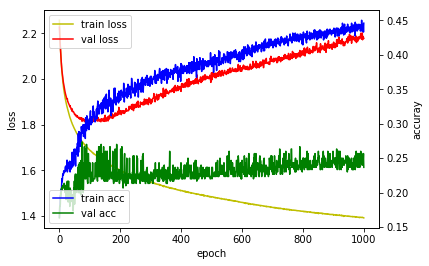

In [14]:
import keras

# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []        
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
    
# 모델 학습시키기

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기

custom_hist = CustomHistory()
custom_hist.init()

for epoch_idx in range(1000):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(X_train, Y_train, epochs=1, batch_size=10, validation_data=(X_val, Y_val), callbacks=[custom_hist])

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss, 'y', label='train loss')
loss_ax.plot(custom_hist.val_loss, 'r', label='val loss')

acc_ax.plot(custom_hist.train_acc, 'b', label='train acc')
acc_ax.plot(custom_hist.val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [15]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val))

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - ETA: 0s - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/3000
700/700 [==============================] - ETA: 0s - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/3000
700/700 [==============================] - ETA: 0s - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/3000
700/700 [==============================] - ETA: 0s - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/3000
700/700 [==============================] - ETA: 0s - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/3000
700/700 [==============================] - ETA: 0s - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/3000
700/700 [==============================] - ETA: 0s - loss: 2.0719 - acc: 0.2086 - val_loss: 2.0727 - val_acc: 0.2067
Epoch 8/3000
700/700 [======================

700/700 [==============================] - ETA: 0s - loss: 1.7501 - acc: 0.2814 - val_loss: 1.8304 - val_acc: 0.2000
Epoch 64/3000
700/700 [==============================] - ETA: 0s - loss: 1.7480 - acc: 0.2800 - val_loss: 1.8279 - val_acc: 0.2167
Epoch 65/3000
700/700 [==============================] - ETA: 0s - loss: 1.7454 - acc: 0.2843 - val_loss: 1.8306 - val_acc: 0.2000
Epoch 66/3000
700/700 [==============================] - ETA: 0s - loss: 1.7436 - acc: 0.2800 - val_loss: 1.8305 - val_acc: 0.2067
Epoch 67/3000
700/700 [==============================] - ETA: 0s - loss: 1.7417 - acc: 0.2671 - val_loss: 1.8300 - val_acc: 0.2033
Epoch 68/3000
700/700 [==============================] - ETA: 0s - loss: 1.7401 - acc: 0.2757 - val_loss: 1.8243 - val_acc: 0.2000
Epoch 69/3000
700/700 [==============================] - ETA: 0s - loss: 1.7373 - acc: 0.2843 - val_loss: 1.8291 - val_acc: 0.2167
Epoch 70/3000
700/700 [==============================] - ETA: 0s - loss: 1.7353 - acc: 0.2843 - v

700/700 [==============================] - ETA: 0s - loss: 1.6591 - acc: 0.3171 - val_loss: 1.8290 - val_acc: 0.2367
Epoch 126/3000
700/700 [==============================] - ETA: 0s - loss: 1.6573 - acc: 0.3186 - val_loss: 1.8295 - val_acc: 0.2267
Epoch 127/3000
700/700 [==============================] - ETA: 0s - loss: 1.6565 - acc: 0.3200 - val_loss: 1.8174 - val_acc: 0.2400
Epoch 128/3000
700/700 [==============================] - ETA: 0s - loss: 1.6546 - acc: 0.3357 - val_loss: 1.8324 - val_acc: 0.2200
Epoch 129/3000
700/700 [==============================] - ETA: 0s - loss: 1.6550 - acc: 0.3129 - val_loss: 1.8266 - val_acc: 0.2233
Epoch 130/3000
700/700 [==============================] - ETA: 0s - loss: 1.6528 - acc: 0.3257 - val_loss: 1.8176 - val_acc: 0.2567
Epoch 131/3000
700/700 [==============================] - ETA: 0s - loss: 1.6524 - acc: 0.3229 - val_loss: 1.8281 - val_acc: 0.2533
Epoch 132/3000
700/700 [==============================] - ETA: 0s - loss: 1.6522 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.6057 - acc: 0.3543 - val_loss: 1.8475 - val_acc: 0.2200
Epoch 188/3000
700/700 [==============================] - ETA: 0s - loss: 1.6066 - acc: 0.3414 - val_loss: 1.8435 - val_acc: 0.2200
Epoch 189/3000
700/700 [==============================] - ETA: 0s - loss: 1.6037 - acc: 0.3543 - val_loss: 1.8558 - val_acc: 0.2200
Epoch 190/3000
700/700 [==============================] - ETA: 0s - loss: 1.6057 - acc: 0.3314 - val_loss: 1.8426 - val_acc: 0.2333
Epoch 191/3000
700/700 [==============================] - ETA: 0s - loss: 1.6033 - acc: 0.3571 - val_loss: 1.8621 - val_acc: 0.2233
Epoch 192/3000
700/700 [==============================] - ETA: 0s - loss: 1.6037 - acc: 0.3486 - val_loss: 1.8528 - val_acc: 0.2200
Epoch 193/3000
700/700 [==============================] - ETA: 0s - loss: 1.6021 - acc: 0.3443 - val_loss: 1.8570 - val_acc: 0.2300
Epoch 194/3000
700/700 [==============================] - ETA: 0s - loss: 1.6017 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.5708 - acc: 0.3471 - val_loss: 1.8868 - val_acc: 0.2267
Epoch 250/3000
700/700 [==============================] - ETA: 0s - loss: 1.5675 - acc: 0.3629 - val_loss: 1.9023 - val_acc: 0.2167
Epoch 251/3000
700/700 [==============================] - ETA: 0s - loss: 1.5699 - acc: 0.3471 - val_loss: 1.8843 - val_acc: 0.2333
Epoch 252/3000
700/700 [==============================] - ETA: 0s - loss: 1.5677 - acc: 0.3657 - val_loss: 1.8804 - val_acc: 0.2300
Epoch 253/3000
700/700 [==============================] - ETA: 0s - loss: 1.5684 - acc: 0.3543 - val_loss: 1.8865 - val_acc: 0.2167
Epoch 254/3000
700/700 [==============================] - ETA: 0s - loss: 1.5674 - acc: 0.3557 - val_loss: 1.8857 - val_acc: 0.2267
Epoch 255/3000
700/700 [==============================] - ETA: 0s - loss: 1.5677 - acc: 0.3471 - val_loss: 1.8744 - val_acc: 0.2300
Epoch 256/3000
700/700 [==============================] - ETA: 0s - loss: 1.5653 - acc: 0.3

Epoch 311/3000
700/700 [==============================] - ETA: 0s - loss: 1.5423 - acc: 0.3571 - val_loss: 1.9101 - val_acc: 0.2300
Epoch 312/3000
700/700 [==============================] - ETA: 0s - loss: 1.5420 - acc: 0.3729 - val_loss: 1.9335 - val_acc: 0.2333
Epoch 313/3000
700/700 [==============================] - ETA: 0s - loss: 1.5383 - acc: 0.3714 - val_loss: 1.9127 - val_acc: 0.2567
Epoch 314/3000
700/700 [==============================] - ETA: 0s - loss: 1.5429 - acc: 0.3671 - val_loss: 1.9181 - val_acc: 0.2300
Epoch 315/3000
700/700 [==============================] - ETA: 0s - loss: 1.5401 - acc: 0.3643 - val_loss: 1.9162 - val_acc: 0.2233
Epoch 316/3000
700/700 [==============================] - ETA: 0s - loss: 1.5401 - acc: 0.3643 - val_loss: 1.9192 - val_acc: 0.2267
Epoch 317/3000
700/700 [==============================] - ETA: 0s - loss: 1.5409 - acc: 0.3600 - val_loss: 1.9272 - val_acc: 0.2333
Epoch 318/3000
700/700 [==============================] - ETA: 0s - loss: 1.

700/700 [==============================] - ETA: 0s - loss: 1.5180 - acc: 0.3757 - val_loss: 1.9592 - val_acc: 0.2200
Epoch 374/3000
700/700 [==============================] - ETA: 0s - loss: 1.5173 - acc: 0.3686 - val_loss: 1.9537 - val_acc: 0.2333
Epoch 375/3000
700/700 [==============================] - ETA: 0s - loss: 1.5156 - acc: 0.3843 - val_loss: 1.9444 - val_acc: 0.2267
Epoch 376/3000
700/700 [==============================] - ETA: 0s - loss: 1.5158 - acc: 0.3786 - val_loss: 1.9530 - val_acc: 0.2200
Epoch 377/3000
700/700 [==============================] - ETA: 0s - loss: 1.5149 - acc: 0.3714 - val_loss: 1.9757 - val_acc: 0.2233
Epoch 378/3000
700/700 [==============================] - ETA: 0s - loss: 1.5157 - acc: 0.3743 - val_loss: 1.9806 - val_acc: 0.2333
Epoch 379/3000
700/700 [==============================] - ETA: 0s - loss: 1.5162 - acc: 0.3714 - val_loss: 1.9533 - val_acc: 0.2400
Epoch 380/3000
700/700 [==============================] - ETA: 0s - loss: 1.5140 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.4964 - acc: 0.3929 - val_loss: 1.9861 - val_acc: 0.2333
Epoch 436/3000
700/700 [==============================] - ETA: 0s - loss: 1.4979 - acc: 0.3900 - val_loss: 1.9701 - val_acc: 0.2267
Epoch 437/3000
700/700 [==============================] - ETA: 0s - loss: 1.4963 - acc: 0.3957 - val_loss: 1.9878 - val_acc: 0.2300
Epoch 438/3000
700/700 [==============================] - ETA: 0s - loss: 1.4955 - acc: 0.3900 - val_loss: 1.9653 - val_acc: 0.2300
Epoch 439/3000
700/700 [==============================] - ETA: 0s - loss: 1.4953 - acc: 0.3771 - val_loss: 1.9771 - val_acc: 0.2267
Epoch 440/3000
700/700 [==============================] - ETA: 0s - loss: 1.4965 - acc: 0.3800 - val_loss: 1.9776 - val_acc: 0.2300
Epoch 441/3000
700/700 [==============================] - ETA: 0s - loss: 1.4957 - acc: 0.3871 - val_loss: 1.9809 - val_acc: 0.2267
Epoch 442/3000
700/700 [==============================] - ETA: 0s - loss: 1.4953 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.4792 - acc: 0.3871 - val_loss: 2.0129 - val_acc: 0.2467
Epoch 498/3000
700/700 [==============================] - ETA: 0s - loss: 1.4787 - acc: 0.3814 - val_loss: 2.0401 - val_acc: 0.2333
Epoch 499/3000
700/700 [==============================] - ETA: 0s - loss: 1.4795 - acc: 0.3971 - val_loss: 2.0197 - val_acc: 0.2367
Epoch 500/3000
700/700 [==============================] - ETA: 0s - loss: 1.4802 - acc: 0.3900 - val_loss: 2.0202 - val_acc: 0.2367
Epoch 501/3000
700/700 [==============================] - ETA: 0s - loss: 1.4802 - acc: 0.3943 - val_loss: 2.0235 - val_acc: 0.2300
Epoch 502/3000
700/700 [==============================] - ETA: 0s - loss: 1.4782 - acc: 0.3900 - val_loss: 2.0182 - val_acc: 0.2267
Epoch 503/3000
700/700 [==============================] - ETA: 0s - loss: 1.4787 - acc: 0.4014 - val_loss: 2.0152 - val_acc: 0.2267
Epoch 504/3000
700/700 [==============================] - ETA: 0s - loss: 1.4779 - acc: 0.3

700/700 [==============================] - ETA: 0s - loss: 1.4645 - acc: 0.4029 - val_loss: 2.0337 - val_acc: 0.2500
Epoch 560/3000
700/700 [==============================] - ETA: 0s - loss: 1.4646 - acc: 0.4043 - val_loss: 2.0382 - val_acc: 0.2567
Epoch 561/3000
700/700 [==============================] - ETA: 0s - loss: 1.4656 - acc: 0.3971 - val_loss: 2.0286 - val_acc: 0.2300
Epoch 562/3000
700/700 [==============================] - ETA: 0s - loss: 1.4652 - acc: 0.3986 - val_loss: 2.0310 - val_acc: 0.2233
Epoch 563/3000
700/700 [==============================] - ETA: 0s - loss: 1.4644 - acc: 0.3957 - val_loss: 2.0283 - val_acc: 0.2267
Epoch 564/3000
700/700 [==============================] - ETA: 0s - loss: 1.4644 - acc: 0.4100 - val_loss: 2.0442 - val_acc: 0.2267
Epoch 565/3000
700/700 [==============================] - ETA: 0s - loss: 1.4636 - acc: 0.3986 - val_loss: 2.0322 - val_acc: 0.2333
Epoch 566/3000
700/700 [==============================] - ETA: 0s - loss: 1.4655 - acc: 0.4

Epoch 621/3000
700/700 [==============================] - ETA: 0s - loss: 1.4525 - acc: 0.4143 - val_loss: 2.0674 - val_acc: 0.2367
Epoch 622/3000
700/700 [==============================] - ETA: 0s - loss: 1.4516 - acc: 0.4086 - val_loss: 2.0655 - val_acc: 0.2367
Epoch 623/3000
700/700 [==============================] - ETA: 0s - loss: 1.4507 - acc: 0.4129 - val_loss: 2.0613 - val_acc: 0.2300
Epoch 624/3000
700/700 [==============================] - ETA: 0s - loss: 1.4518 - acc: 0.4143 - val_loss: 2.0609 - val_acc: 0.2333
Epoch 625/3000
700/700 [==============================] - ETA: 0s - loss: 1.4516 - acc: 0.4057 - val_loss: 2.0651 - val_acc: 0.2433
Epoch 626/3000
700/700 [==============================] - ETA: 0s - loss: 1.4508 - acc: 0.4043 - val_loss: 2.0452 - val_acc: 0.2333
Epoch 627/3000
700/700 [==============================] - ETA: 0s - loss: 1.4516 - acc: 0.4186 - val_loss: 2.0543 - val_acc: 0.2333
Epoch 628/3000
700/700 [==============================] - ETA: 0s - loss: 1.

700/700 [==============================] - ETA: 0s - loss: 1.4404 - acc: 0.4043 - val_loss: 2.0680 - val_acc: 0.2500
Epoch 684/3000
700/700 [==============================] - ETA: 0s - loss: 1.4367 - acc: 0.4129 - val_loss: 2.0819 - val_acc: 0.2567
Epoch 685/3000
700/700 [==============================] - ETA: 0s - loss: 1.4398 - acc: 0.4100 - val_loss: 2.0775 - val_acc: 0.2500
Epoch 686/3000
700/700 [==============================] - ETA: 0s - loss: 1.4396 - acc: 0.4143 - val_loss: 2.0973 - val_acc: 0.2533
Epoch 687/3000
700/700 [==============================] - ETA: 0s - loss: 1.4393 - acc: 0.4171 - val_loss: 2.0704 - val_acc: 0.2367
Epoch 688/3000
700/700 [==============================] - ETA: 0s - loss: 1.4398 - acc: 0.4171 - val_loss: 2.0791 - val_acc: 0.2333
Epoch 689/3000
700/700 [==============================] - ETA: 0s - loss: 1.4392 - acc: 0.4129 - val_loss: 2.0836 - val_acc: 0.2433
Epoch 690/3000
700/700 [==============================] - ETA: 0s - loss: 1.4389 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4260 - acc: 0.4343 - val_loss: 2.1075 - val_acc: 0.2600
Epoch 746/3000
700/700 [==============================] - ETA: 0s - loss: 1.4291 - acc: 0.4257 - val_loss: 2.1002 - val_acc: 0.2400
Epoch 747/3000
700/700 [==============================] - ETA: 0s - loss: 1.4288 - acc: 0.4171 - val_loss: 2.1119 - val_acc: 0.2433
Epoch 748/3000
700/700 [==============================] - ETA: 0s - loss: 1.4268 - acc: 0.4186 - val_loss: 2.1170 - val_acc: 0.2567
Epoch 749/3000
700/700 [==============================] - ETA: 0s - loss: 1.4259 - acc: 0.4214 - val_loss: 2.0881 - val_acc: 0.2367
Epoch 750/3000
700/700 [==============================] - ETA: 0s - loss: 1.4279 - acc: 0.4286 - val_loss: 2.0938 - val_acc: 0.2367
Epoch 751/3000
700/700 [==============================] - ETA: 0s - loss: 1.4262 - acc: 0.4157 - val_loss: 2.1048 - val_acc: 0.2400
Epoch 752/3000
700/700 [==============================] - ETA: 0s - loss: 1.4270 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4187 - acc: 0.4314 - val_loss: 2.1214 - val_acc: 0.2400
Epoch 808/3000
700/700 [==============================] - ETA: 0s - loss: 1.4180 - acc: 0.4214 - val_loss: 2.1177 - val_acc: 0.2467
Epoch 809/3000
700/700 [==============================] - ETA: 0s - loss: 1.4188 - acc: 0.4200 - val_loss: 2.1297 - val_acc: 0.2467
Epoch 810/3000
700/700 [==============================] - ETA: 0s - loss: 1.4175 - acc: 0.4314 - val_loss: 2.1294 - val_acc: 0.2433
Epoch 811/3000
700/700 [==============================] - ETA: 0s - loss: 1.4179 - acc: 0.4286 - val_loss: 2.1248 - val_acc: 0.2467
Epoch 812/3000
700/700 [==============================] - ETA: 0s - loss: 1.4177 - acc: 0.4257 - val_loss: 2.1166 - val_acc: 0.2433
Epoch 813/3000
700/700 [==============================] - ETA: 0s - loss: 1.4178 - acc: 0.4329 - val_loss: 2.1310 - val_acc: 0.2367
Epoch 814/3000
700/700 [==============================] - ETA: 0s - loss: 1.4164 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4087 - acc: 0.4329 - val_loss: 2.1464 - val_acc: 0.2400
Epoch 870/3000
700/700 [==============================] - ETA: 0s - loss: 1.4069 - acc: 0.4343 - val_loss: 2.1605 - val_acc: 0.2467
Epoch 871/3000
700/700 [==============================] - ETA: 0s - loss: 1.4085 - acc: 0.4300 - val_loss: 2.1650 - val_acc: 0.2433
Epoch 872/3000
700/700 [==============================] - ETA: 0s - loss: 1.4074 - acc: 0.4314 - val_loss: 2.1476 - val_acc: 0.2633
Epoch 873/3000
700/700 [==============================] - ETA: 0s - loss: 1.4080 - acc: 0.4286 - val_loss: 2.1295 - val_acc: 0.2367
Epoch 874/3000
700/700 [==============================] - ETA: 0s - loss: 1.4085 - acc: 0.4300 - val_loss: 2.1407 - val_acc: 0.2400
Epoch 875/3000
700/700 [==============================] - ETA: 0s - loss: 1.4076 - acc: 0.4343 - val_loss: 2.1613 - val_acc: 0.2467
Epoch 876/3000
700/700 [==============================] - ETA: 0s - loss: 1.4074 - acc: 0.4

700/700 [==============================] - ETA: 0s - loss: 1.4005 - acc: 0.4357 - val_loss: 2.1661 - val_acc: 0.2467
Epoch 932/3000
700/700 [==============================] - ETA: 0s - loss: 1.4199 - acc: 0.441 - ETA: 0s - loss: 1.4000 - acc: 0.4429 - val_loss: 2.1570 - val_acc: 0.2500
Epoch 933/3000
700/700 [==============================] - ETA: 0s - loss: 1.4005 - acc: 0.4314 - val_loss: 2.1688 - val_acc: 0.2500
Epoch 934/3000
700/700 [==============================] - ETA: 0s - loss: 1.3996 - acc: 0.4371 - val_loss: 2.1751 - val_acc: 0.2533
Epoch 935/3000
700/700 [==============================] - ETA: 0s - loss: 1.4007 - acc: 0.4371 - val_loss: 2.1730 - val_acc: 0.2500
Epoch 936/3000
700/700 [==============================] - ETA: 0s - loss: 1.4002 - acc: 0.4400 - val_loss: 2.1801 - val_acc: 0.2567
Epoch 937/3000
700/700 [==============================] - ETA: 0s - loss: 1.3999 - acc: 0.4314 - val_loss: 2.1735 - val_acc: 0.2433
Epoch 938/3000
700/700 [=============================

Epoch 993/3000
700/700 [==============================] - ETA: 0s - loss: 1.3925 - acc: 0.4486 - val_loss: 2.1934 - val_acc: 0.2433
Epoch 994/3000
700/700 [==============================] - ETA: 0s - loss: 1.3921 - acc: 0.4343 - val_loss: 2.1780 - val_acc: 0.2367
Epoch 995/3000
700/700 [==============================] - ETA: 0s - loss: 1.3930 - acc: 0.4400 - val_loss: 2.1981 - val_acc: 0.2467
Epoch 996/3000
700/700 [==============================] - ETA: 0s - loss: 1.3916 - acc: 0.4457 - val_loss: 2.1997 - val_acc: 0.2467
Epoch 997/3000
700/700 [==============================] - ETA: 0s - loss: 1.3914 - acc: 0.4443 - val_loss: 2.2021 - val_acc: 0.2467
Epoch 998/3000
700/700 [==============================] - ETA: 0s - loss: 1.3923 - acc: 0.4429 - val_loss: 2.2110 - val_acc: 0.2500
Epoch 999/3000
700/700 [==============================] - ETA: 0s - loss: 1.3920 - acc: 0.4371 - val_loss: 2.1971 - val_acc: 0.2467
Epoch 1000/3000
700/700 [==============================] - ETA: 0s - loss: 1

700/700 [==============================] - ETA: 0s - loss: 1.3850 - acc: 0.4500 - val_loss: 2.1985 - val_acc: 0.2400
Epoch 1055/3000
700/700 [==============================] - ETA: 0s - loss: 1.3846 - acc: 0.4443 - val_loss: 2.2043 - val_acc: 0.2367
Epoch 1056/3000
700/700 [==============================] - ETA: 0s - loss: 1.3845 - acc: 0.4414 - val_loss: 2.2213 - val_acc: 0.2333
Epoch 1057/3000
700/700 [==============================] - ETA: 0s - loss: 1.3838 - acc: 0.4386 - val_loss: 2.2275 - val_acc: 0.2433
Epoch 1058/3000
700/700 [==============================] - ETA: 0s - loss: 1.3851 - acc: 0.4443 - val_loss: 2.2199 - val_acc: 0.2400
Epoch 1059/3000
700/700 [==============================] - ETA: 0s - loss: 1.3837 - acc: 0.4429 - val_loss: 2.2145 - val_acc: 0.2467
Epoch 1060/3000
700/700 [==============================] - ETA: 0s - loss: 1.3840 - acc: 0.4429 - val_loss: 2.2057 - val_acc: 0.2467
Epoch 1061/3000
700/700 [==============================] - ETA: 0s - loss: 1.3844 - a

Epoch 1116/3000
700/700 [==============================] - ETA: 0s - loss: 1.3777 - acc: 0.4529 - val_loss: 2.2355 - val_acc: 0.2367
Epoch 1117/3000
700/700 [==============================] - ETA: 0s - loss: 1.3777 - acc: 0.4500 - val_loss: 2.2320 - val_acc: 0.2400
Epoch 1118/3000
700/700 [==============================] - ETA: 0s - loss: 1.3779 - acc: 0.4529 - val_loss: 2.2346 - val_acc: 0.2367
Epoch 1119/3000
700/700 [==============================] - ETA: 0s - loss: 1.3771 - acc: 0.4400 - val_loss: 2.2360 - val_acc: 0.2333
Epoch 1120/3000
700/700 [==============================] - ETA: 0s - loss: 1.3773 - acc: 0.4529 - val_loss: 2.2498 - val_acc: 0.2433
Epoch 1121/3000
700/700 [==============================] - ETA: 0s - loss: 1.3781 - acc: 0.4443 - val_loss: 2.2274 - val_acc: 0.2400
Epoch 1122/3000
700/700 [==============================] - ETA: 0s - loss: 1.3776 - acc: 0.4500 - val_loss: 2.2392 - val_acc: 0.2333
Epoch 1123/3000
700/700 [==============================] - ETA: 0s - 

700/700 [==============================] - ETA: 0s - loss: 1.3720 - acc: 0.4514 - val_loss: 2.2582 - val_acc: 0.2333
Epoch 1178/3000
700/700 [==============================] - ETA: 0s - loss: 1.3713 - acc: 0.4457 - val_loss: 2.2531 - val_acc: 0.2233
Epoch 1179/3000
700/700 [==============================] - ETA: 0s - loss: 1.3716 - acc: 0.4543 - val_loss: 2.2515 - val_acc: 0.2267
Epoch 1180/3000
700/700 [==============================] - ETA: 0s - loss: 1.3721 - acc: 0.4514 - val_loss: 2.2535 - val_acc: 0.2333
Epoch 1181/3000
700/700 [==============================] - ETA: 0s - loss: 1.3710 - acc: 0.4557 - val_loss: 2.2641 - val_acc: 0.2467
Epoch 1182/3000
700/700 [==============================] - ETA: 0s - loss: 1.3722 - acc: 0.4486 - val_loss: 2.2486 - val_acc: 0.2300
Epoch 1183/3000
700/700 [==============================] - ETA: 0s - loss: 1.3716 - acc: 0.4486 - val_loss: 2.2526 - val_acc: 0.2400
Epoch 1184/3000
700/700 [==============================] - ETA: 0s - loss: 1.3702 - a

Epoch 1239/3000
700/700 [==============================] - ETA: 0s - loss: 1.3660 - acc: 0.4500 - val_loss: 2.2557 - val_acc: 0.2333
Epoch 1240/3000
700/700 [==============================] - ETA: 0s - loss: 1.3656 - acc: 0.4529 - val_loss: 2.2561 - val_acc: 0.2300
Epoch 1241/3000
700/700 [==============================] - ETA: 0s - loss: 1.3655 - acc: 0.4529 - val_loss: 2.2621 - val_acc: 0.2367
Epoch 1242/3000
700/700 [==============================] - ETA: 0s - loss: 1.3649 - acc: 0.4486 - val_loss: 2.2593 - val_acc: 0.2300
Epoch 1243/3000
700/700 [==============================] - ETA: 0s - loss: 1.3772 - acc: 0.456 - ETA: 0s - loss: 1.3652 - acc: 0.4629 - val_loss: 2.2740 - val_acc: 0.2367
Epoch 1244/3000
700/700 [==============================] - ETA: 0s - loss: 1.3653 - acc: 0.4529 - val_loss: 2.2491 - val_acc: 0.2333
Epoch 1245/3000
700/700 [==============================] - ETA: 0s - loss: 1.3651 - acc: 0.4514 - val_loss: 2.2521 - val_acc: 0.2300
Epoch 1246/3000
700/700 [======

700/700 [==============================] - ETA: 0s - loss: 1.3589 - acc: 0.4671 - val_loss: 2.2750 - val_acc: 0.2267
Epoch 1301/3000
700/700 [==============================] - ETA: 0s - loss: 1.3586 - acc: 0.4529 - val_loss: 2.2633 - val_acc: 0.2367
Epoch 1302/3000
700/700 [==============================] - ETA: 0s - loss: 1.3602 - acc: 0.4586 - val_loss: 2.2814 - val_acc: 0.2367
Epoch 1303/3000
700/700 [==============================] - ETA: 0s - loss: 1.3601 - acc: 0.4629 - val_loss: 2.2778 - val_acc: 0.2367
Epoch 1304/3000
700/700 [==============================] - ETA: 0s - loss: 1.3595 - acc: 0.4657 - val_loss: 2.2875 - val_acc: 0.2333
Epoch 1305/3000
700/700 [==============================] - ETA: 0s - loss: 1.3588 - acc: 0.4629 - val_loss: 2.2784 - val_acc: 0.2300
Epoch 1306/3000
700/700 [==============================] - ETA: 0s - loss: 1.3592 - acc: 0.4557 - val_loss: 2.2764 - val_acc: 0.2400
Epoch 1307/3000
700/700 [==============================] - ETA: 0s - loss: 1.3596 - a

Epoch 1362/3000
700/700 [==============================] - ETA: 0s - loss: 1.3541 - acc: 0.4600 - val_loss: 2.2803 - val_acc: 0.2300
Epoch 1363/3000
700/700 [==============================] - ETA: 0s - loss: 1.3545 - acc: 0.4657 - val_loss: 2.2905 - val_acc: 0.2300
Epoch 1364/3000
700/700 [==============================] - ETA: 0s - loss: 1.3540 - acc: 0.4600 - val_loss: 2.3002 - val_acc: 0.2333
Epoch 1365/3000
700/700 [==============================] - ETA: 0s - loss: 1.3547 - acc: 0.4671 - val_loss: 2.2777 - val_acc: 0.2300
Epoch 1366/3000
700/700 [==============================] - ETA: 0s - loss: 1.3543 - acc: 0.4586 - val_loss: 2.2944 - val_acc: 0.2433
Epoch 1367/3000
700/700 [==============================] - ETA: 0s - loss: 1.3540 - acc: 0.4657 - val_loss: 2.2809 - val_acc: 0.2367
Epoch 1368/3000
700/700 [==============================] - ETA: 0s - loss: 1.3540 - acc: 0.4643 - val_loss: 2.2976 - val_acc: 0.2367
Epoch 1369/3000
700/700 [==============================] - ETA: 0s - 

700/700 [==============================] - ETA: 0s - loss: 1.3491 - acc: 0.4629 - val_loss: 2.3194 - val_acc: 0.2300
Epoch 1424/3000
700/700 [==============================] - ETA: 0s - loss: 1.3500 - acc: 0.4614 - val_loss: 2.3144 - val_acc: 0.2367
Epoch 1425/3000
700/700 [==============================] - ETA: 0s - loss: 1.3482 - acc: 0.4600 - val_loss: 2.3158 - val_acc: 0.2300
Epoch 1426/3000
700/700 [==============================] - ETA: 0s - loss: 1.3489 - acc: 0.4671 - val_loss: 2.3122 - val_acc: 0.2400
Epoch 1427/3000
700/700 [==============================] - ETA: 0s - loss: 1.3484 - acc: 0.4671 - val_loss: 2.3251 - val_acc: 0.2433
Epoch 1428/3000
700/700 [==============================] - ETA: 0s - loss: 1.3488 - acc: 0.4700 - val_loss: 2.3069 - val_acc: 0.2367
Epoch 1429/3000
700/700 [==============================] - ETA: 0s - loss: 1.3489 - acc: 0.4629 - val_loss: 2.2903 - val_acc: 0.2300
Epoch 1430/3000
700/700 [==============================] - ETA: 0s - loss: 1.3487 - a

700/700 [==============================] - ETA: 0s - loss: 1.3444 - acc: 0.4629 - val_loss: 2.3232 - val_acc: 0.2300
Epoch 1485/3000
700/700 [==============================] - ETA: 0s - loss: 1.3442 - acc: 0.4686 - val_loss: 2.3356 - val_acc: 0.2333
Epoch 1486/3000
700/700 [==============================] - ETA: 0s - loss: 1.3446 - acc: 0.4700 - val_loss: 2.3120 - val_acc: 0.2367
Epoch 1487/3000
700/700 [==============================] - ETA: 0s - loss: 1.3440 - acc: 0.4657 - val_loss: 2.3316 - val_acc: 0.2433
Epoch 1488/3000
700/700 [==============================] - ETA: 0s - loss: 1.3435 - acc: 0.4600 - val_loss: 2.3068 - val_acc: 0.2267
Epoch 1489/3000
700/700 [==============================] - ETA: 0s - loss: 1.3442 - acc: 0.4629 - val_loss: 2.3358 - val_acc: 0.2333
Epoch 1490/3000
700/700 [==============================] - ETA: 0s - loss: 1.3435 - acc: 0.4700 - val_loss: 2.3331 - val_acc: 0.2400
Epoch 1491/3000
700/700 [==============================] - ETA: 0s - loss: 1.3440 - a

Epoch 1546/3000
700/700 [==============================] - ETA: 0s - loss: 1.3401 - acc: 0.4843 - val_loss: 2.3361 - val_acc: 0.2333
Epoch 1547/3000
700/700 [==============================] - ETA: 0s - loss: 1.3400 - acc: 0.4714 - val_loss: 2.3459 - val_acc: 0.2333
Epoch 1548/3000
700/700 [==============================] - ETA: 0s - loss: 1.3406 - acc: 0.4657 - val_loss: 2.3395 - val_acc: 0.2433
Epoch 1549/3000
700/700 [==============================] - ETA: 0s - loss: 1.3385 - acc: 0.4729 - val_loss: 2.3493 - val_acc: 0.2367
Epoch 1550/3000
700/700 [==============================] - ETA: 0s - loss: 1.3400 - acc: 0.4729 - val_loss: 2.3523 - val_acc: 0.2333
Epoch 1551/3000
700/700 [==============================] - ETA: 0s - loss: 1.3394 - acc: 0.4729 - val_loss: 2.3301 - val_acc: 0.2333
Epoch 1552/3000
700/700 [==============================] - ETA: 0s - loss: 1.3394 - acc: 0.4714 - val_loss: 2.3447 - val_acc: 0.2433
Epoch 1553/3000
700/700 [==============================] - ETA: 0s - 

700/700 [==============================] - ETA: 0s - loss: 1.3366 - acc: 0.4757 - val_loss: 2.3427 - val_acc: 0.2367
Epoch 1608/3000
700/700 [==============================] - ETA: 0s - loss: 1.3340 - acc: 0.4686 - val_loss: 2.3486 - val_acc: 0.2400
Epoch 1609/3000
700/700 [==============================] - ETA: 0s - loss: 1.3354 - acc: 0.4771 - val_loss: 2.3602 - val_acc: 0.2400
Epoch 1610/3000
700/700 [==============================] - ETA: 0s - loss: 1.3359 - acc: 0.4671 - val_loss: 2.3479 - val_acc: 0.2367
Epoch 1611/3000
700/700 [==============================] - ETA: 0s - loss: 1.3345 - acc: 0.4757 - val_loss: 2.3634 - val_acc: 0.2300
Epoch 1612/3000
700/700 [==============================] - ETA: 0s - loss: 1.3351 - acc: 0.4686 - val_loss: 2.3515 - val_acc: 0.2367
Epoch 1613/3000
700/700 [==============================] - ETA: 0s - loss: 1.3346 - acc: 0.4729 - val_loss: 2.3535 - val_acc: 0.2333
Epoch 1614/3000
700/700 [==============================] - ETA: 0s - loss: 1.3351 - a

Epoch 1669/3000
700/700 [==============================] - ETA: 0s - loss: 1.3313 - acc: 0.4771 - val_loss: 2.3668 - val_acc: 0.2367
Epoch 1670/3000
700/700 [==============================] - ETA: 0s - loss: 1.3304 - acc: 0.4786 - val_loss: 2.3799 - val_acc: 0.2400
Epoch 1671/3000
700/700 [==============================] - ETA: 0s - loss: 1.3312 - acc: 0.4700 - val_loss: 2.3781 - val_acc: 0.2333
Epoch 1672/3000
700/700 [==============================] - ETA: 0s - loss: 1.3306 - acc: 0.4729 - val_loss: 2.3678 - val_acc: 0.2333
Epoch 1673/3000
700/700 [==============================] - ETA: 0s - loss: 1.3304 - acc: 0.4771 - val_loss: 2.3902 - val_acc: 0.2400
Epoch 1674/3000
700/700 [==============================] - ETA: 0s - loss: 1.3297 - acc: 0.4786 - val_loss: 2.3869 - val_acc: 0.2333
Epoch 1675/3000
700/700 [==============================] - ETA: 0s - loss: 1.3307 - acc: 0.4700 - val_loss: 2.3620 - val_acc: 0.2333
Epoch 1676/3000
700/700 [==============================] - ETA: 0s - 

700/700 [==============================] - ETA: 0s - loss: 1.3259 - acc: 0.4786 - val_loss: 2.3668 - val_acc: 0.2367
Epoch 1731/3000
700/700 [==============================] - ETA: 0s - loss: 1.3261 - acc: 0.4829 - val_loss: 2.3953 - val_acc: 0.2367
Epoch 1732/3000
700/700 [==============================] - ETA: 0s - loss: 1.3260 - acc: 0.4829 - val_loss: 2.3899 - val_acc: 0.2333
Epoch 1733/3000
700/700 [==============================] - ETA: 0s - loss: 1.3249 - acc: 0.4814 - val_loss: 2.3935 - val_acc: 0.2367
Epoch 1734/3000
700/700 [==============================] - ETA: 0s - loss: 1.3259 - acc: 0.4743 - val_loss: 2.3819 - val_acc: 0.2333
Epoch 1735/3000
700/700 [==============================] - ETA: 0s - loss: 1.3263 - acc: 0.4757 - val_loss: 2.3709 - val_acc: 0.2400
Epoch 1736/3000
700/700 [==============================] - ETA: 0s - loss: 1.3257 - acc: 0.4786 - val_loss: 2.3866 - val_acc: 0.2333
Epoch 1737/3000
700/700 [==============================] - ETA: 0s - loss: 1.3241 - a

Epoch 1792/3000
700/700 [==============================] - ETA: 0s - loss: 1.3215 - acc: 0.4757 - val_loss: 2.4122 - val_acc: 0.2367
Epoch 1793/3000
700/700 [==============================] - ETA: 0s - loss: 1.3221 - acc: 0.4800 - val_loss: 2.4003 - val_acc: 0.2333
Epoch 1794/3000
700/700 [==============================] - ETA: 0s - loss: 1.3215 - acc: 0.4829 - val_loss: 2.3929 - val_acc: 0.2333
Epoch 1795/3000
700/700 [==============================] - ETA: 0s - loss: 1.3223 - acc: 0.4771 - val_loss: 2.4034 - val_acc: 0.2333
Epoch 1796/3000
700/700 [==============================] - ETA: 0s - loss: 1.3216 - acc: 0.4757 - val_loss: 2.4208 - val_acc: 0.2367
Epoch 1797/3000
700/700 [==============================] - ETA: 0s - loss: 1.3210 - acc: 0.4800 - val_loss: 2.4064 - val_acc: 0.2367
Epoch 1798/3000
700/700 [==============================] - ETA: 0s - loss: 1.3222 - acc: 0.4800 - val_loss: 2.3873 - val_acc: 0.2333
Epoch 1799/3000
700/700 [==============================] - ETA: 0s - 

700/700 [==============================] - ETA: 0s - loss: 1.3186 - acc: 0.4786 - val_loss: 2.4020 - val_acc: 0.2400
Epoch 1854/3000
700/700 [==============================] - ETA: 0s - loss: 1.3177 - acc: 0.4857 - val_loss: 2.4106 - val_acc: 0.2367
Epoch 1855/3000
700/700 [==============================] - ETA: 0s - loss: 1.3180 - acc: 0.4843 - val_loss: 2.4059 - val_acc: 0.2367
Epoch 1856/3000
700/700 [==============================] - ETA: 0s - loss: 1.3166 - acc: 0.4814 - val_loss: 2.4082 - val_acc: 0.2400
Epoch 1857/3000
700/700 [==============================] - ETA: 0s - loss: 1.3187 - acc: 0.4800 - val_loss: 2.4053 - val_acc: 0.2333
Epoch 1858/3000
700/700 [==============================] - ETA: 0s - loss: 1.3181 - acc: 0.4786 - val_loss: 2.4216 - val_acc: 0.2400
Epoch 1859/3000
700/700 [==============================] - ETA: 0s - loss: 1.3168 - acc: 0.4814 - val_loss: 2.3994 - val_acc: 0.2367
Epoch 1860/3000
700/700 [==============================] - ETA: 0s - loss: 1.3174 - a

Epoch 1915/3000
700/700 [==============================] - ETA: 0s - loss: 1.3141 - acc: 0.4829 - val_loss: 2.4219 - val_acc: 0.2333
Epoch 1916/3000
700/700 [==============================] - ETA: 0s - loss: 1.3140 - acc: 0.4857 - val_loss: 2.4144 - val_acc: 0.2333
Epoch 1917/3000
700/700 [==============================] - ETA: 0s - loss: 1.3148 - acc: 0.4857 - val_loss: 2.4209 - val_acc: 0.2367
Epoch 1918/3000
700/700 [==============================] - ETA: 0s - loss: 1.3141 - acc: 0.4886 - val_loss: 2.4355 - val_acc: 0.2400
Epoch 1919/3000
700/700 [==============================] - ETA: 0s - loss: 1.3143 - acc: 0.4800 - val_loss: 2.4321 - val_acc: 0.2367
Epoch 1920/3000
700/700 [==============================] - ETA: 0s - loss: 1.3154 - acc: 0.4886 - val_loss: 2.4299 - val_acc: 0.2333
Epoch 1921/3000
700/700 [==============================] - ETA: 0s - loss: 1.3139 - acc: 0.4843 - val_loss: 2.4287 - val_acc: 0.2333
Epoch 1922/3000
700/700 [==============================] - ETA: 0s - 

700/700 [==============================] - ETA: 0s - loss: 1.3112 - acc: 0.4800 - val_loss: 2.4466 - val_acc: 0.2433
Epoch 1977/3000
700/700 [==============================] - ETA: 0s - loss: 1.3108 - acc: 0.4914 - val_loss: 2.4353 - val_acc: 0.2333
Epoch 1978/3000
700/700 [==============================] - ETA: 0s - loss: 1.3111 - acc: 0.4900 - val_loss: 2.4432 - val_acc: 0.2367
Epoch 1979/3000
700/700 [==============================] - ETA: 0s - loss: 1.3101 - acc: 0.4814 - val_loss: 2.4667 - val_acc: 0.2367
Epoch 1980/3000
700/700 [==============================] - ETA: 0s - loss: 1.3090 - acc: 0.4857 - val_loss: 2.4322 - val_acc: 0.2367
Epoch 1981/3000
700/700 [==============================] - ETA: 0s - loss: 1.3105 - acc: 0.4843 - val_loss: 2.4351 - val_acc: 0.2400
Epoch 1982/3000
700/700 [==============================] - ETA: 0s - loss: 1.3102 - acc: 0.4929 - val_loss: 2.4291 - val_acc: 0.2367
Epoch 1983/3000
700/700 [==============================] - ETA: 0s - loss: 1.3103 - a

Epoch 2038/3000
700/700 [==============================] - ETA: 0s - loss: 1.3070 - acc: 0.4871 - val_loss: 2.4506 - val_acc: 0.2367
Epoch 2039/3000
700/700 [==============================] - ETA: 0s - loss: 1.3078 - acc: 0.4929 - val_loss: 2.4689 - val_acc: 0.2367
Epoch 2040/3000
700/700 [==============================] - ETA: 0s - loss: 1.3074 - acc: 0.4900 - val_loss: 2.4616 - val_acc: 0.2433
Epoch 2041/3000
700/700 [==============================] - ETA: 0s - loss: 1.3065 - acc: 0.4886 - val_loss: 2.4634 - val_acc: 0.2433
Epoch 2042/3000
700/700 [==============================] - ETA: 0s - loss: 1.3073 - acc: 0.4900 - val_loss: 2.4773 - val_acc: 0.2367
Epoch 2043/3000
700/700 [==============================] - ETA: 0s - loss: 1.3068 - acc: 0.4871 - val_loss: 2.4730 - val_acc: 0.2433
Epoch 2044/3000
700/700 [==============================] - ETA: 0s - loss: 1.3074 - acc: 0.4871 - val_loss: 2.4568 - val_acc: 0.2400
Epoch 2045/3000
700/700 [==============================] - ETA: 0s - 

700/700 [==============================] - ETA: 0s - loss: 1.3042 - acc: 0.4871 - val_loss: 2.4679 - val_acc: 0.2400
Epoch 2100/3000
700/700 [==============================] - ETA: 0s - loss: 1.3037 - acc: 0.4857 - val_loss: 2.4655 - val_acc: 0.2367
Epoch 2101/3000
700/700 [==============================] - ETA: 0s - loss: 1.3044 - acc: 0.4929 - val_loss: 2.4576 - val_acc: 0.2367
Epoch 2102/3000
700/700 [==============================] - ETA: 0s - loss: 1.3046 - acc: 0.4914 - val_loss: 2.4772 - val_acc: 0.2400
Epoch 2103/3000
700/700 [==============================] - ETA: 0s - loss: 1.3036 - acc: 0.4843 - val_loss: 2.4801 - val_acc: 0.2367
Epoch 2104/3000
700/700 [==============================] - ETA: 0s - loss: 1.3039 - acc: 0.4914 - val_loss: 2.4531 - val_acc: 0.2333
Epoch 2105/3000
700/700 [==============================] - ETA: 0s - loss: 1.3033 - acc: 0.4871 - val_loss: 2.4764 - val_acc: 0.2400
Epoch 2106/3000
700/700 [==============================] - ETA: 0s - loss: 1.3043 - a

Epoch 2161/3000
700/700 [==============================] - ETA: 0s - loss: 1.3186 - acc: 0.494 - ETA: 0s - loss: 1.3008 - acc: 0.4914 - val_loss: 2.4879 - val_acc: 0.2333
Epoch 2162/3000
700/700 [==============================] - ETA: 0s - loss: 1.3004 - acc: 0.4857 - val_loss: 2.4744 - val_acc: 0.2433
Epoch 2163/3000
700/700 [==============================] - ETA: 0s - loss: 1.3010 - acc: 0.4829 - val_loss: 2.4651 - val_acc: 0.2333
Epoch 2164/3000
700/700 [==============================] - ETA: 0s - loss: 1.3015 - acc: 0.4900 - val_loss: 2.4842 - val_acc: 0.2400
Epoch 2165/3000
700/700 [==============================] - ETA: 0s - loss: 1.3007 - acc: 0.4886 - val_loss: 2.4777 - val_acc: 0.2400
Epoch 2166/3000
700/700 [==============================] - ETA: 0s - loss: 1.3009 - acc: 0.4914 - val_loss: 2.4656 - val_acc: 0.2400
Epoch 2167/3000
700/700 [==============================] - ETA: 0s - loss: 1.3004 - acc: 0.4900 - val_loss: 2.4790 - val_acc: 0.2367
Epoch 2168/3000
700/700 [======

700/700 [==============================] - ETA: 0s - loss: 1.2981 - acc: 0.4857 - val_loss: 2.4674 - val_acc: 0.2333
Epoch 2223/3000
700/700 [==============================] - ETA: 0s - loss: 1.2983 - acc: 0.4943 - val_loss: 2.4963 - val_acc: 0.2367
Epoch 2224/3000
700/700 [==============================] - ETA: 0s - loss: 1.2976 - acc: 0.4929 - val_loss: 2.4940 - val_acc: 0.2367
Epoch 2225/3000
700/700 [==============================] - ETA: 0s - loss: 1.2971 - acc: 0.4929 - val_loss: 2.4916 - val_acc: 0.2433
Epoch 2226/3000
700/700 [==============================] - ETA: 0s - loss: 1.2973 - acc: 0.4957 - val_loss: 2.5138 - val_acc: 0.2367
Epoch 2227/3000
700/700 [==============================] - ETA: 0s - loss: 1.2974 - acc: 0.4943 - val_loss: 2.4882 - val_acc: 0.2367
Epoch 2228/3000
700/700 [==============================] - ETA: 0s - loss: 1.2973 - acc: 0.4857 - val_loss: 2.4777 - val_acc: 0.2367
Epoch 2229/3000
700/700 [==============================] - ETA: 0s - loss: 1.2974 - a

Epoch 2284/3000
700/700 [==============================] - ETA: 0s - loss: 1.2953 - acc: 0.4971 - val_loss: 2.4992 - val_acc: 0.2367
Epoch 2285/3000
700/700 [==============================] - ETA: 0s - loss: 1.2953 - acc: 0.4843 - val_loss: 2.5183 - val_acc: 0.2333
Epoch 2286/3000
700/700 [==============================] - ETA: 0s - loss: 1.2942 - acc: 0.4914 - val_loss: 2.5060 - val_acc: 0.2333
Epoch 2287/3000
700/700 [==============================] - ETA: 0s - loss: 1.2944 - acc: 0.4843 - val_loss: 2.4962 - val_acc: 0.2300
Epoch 2288/3000
700/700 [==============================] - ETA: 0s - loss: 1.2939 - acc: 0.4986 - val_loss: 2.5040 - val_acc: 0.2267
Epoch 2289/3000
700/700 [==============================] - ETA: 0s - loss: 1.2944 - acc: 0.4914 - val_loss: 2.5193 - val_acc: 0.2333
Epoch 2290/3000
700/700 [==============================] - ETA: 0s - loss: 1.2941 - acc: 0.4929 - val_loss: 2.4892 - val_acc: 0.2333
Epoch 2291/3000
700/700 [==============================] - ETA: 0s - 

700/700 [==============================] - ETA: 0s - loss: 1.2907 - acc: 0.4914 - val_loss: 2.5251 - val_acc: 0.2367
Epoch 2346/3000
700/700 [==============================] - ETA: 0s - loss: 1.2908 - acc: 0.4971 - val_loss: 2.5349 - val_acc: 0.2367
Epoch 2347/3000
700/700 [==============================] - ETA: 0s - loss: 1.2906 - acc: 0.4886 - val_loss: 2.5395 - val_acc: 0.2400
Epoch 2348/3000
700/700 [==============================] - ETA: 0s - loss: 1.2902 - acc: 0.4914 - val_loss: 2.5258 - val_acc: 0.2367
Epoch 2349/3000
700/700 [==============================] - ETA: 0s - loss: 1.2898 - acc: 0.4929 - val_loss: 2.5263 - val_acc: 0.2400
Epoch 2350/3000
700/700 [==============================] - ETA: 0s - loss: 1.2898 - acc: 0.4900 - val_loss: 2.5313 - val_acc: 0.2400
Epoch 2351/3000
700/700 [==============================] - ETA: 0s - loss: 1.2905 - acc: 0.4929 - val_loss: 2.5256 - val_acc: 0.2300
Epoch 2352/3000
700/700 [==============================] - ETA: 0s - loss: 1.2911 - a

Epoch 2407/3000
700/700 [==============================] - ETA: 0s - loss: 1.2866 - acc: 0.4914 - val_loss: 2.5251 - val_acc: 0.2267
Epoch 2408/3000
700/700 [==============================] - ETA: 0s - loss: 1.2871 - acc: 0.4943 - val_loss: 2.5291 - val_acc: 0.2400
Epoch 2409/3000
700/700 [==============================] - ETA: 0s - loss: 1.2873 - acc: 0.4914 - val_loss: 2.5310 - val_acc: 0.2333
Epoch 2410/3000
700/700 [==============================] - ETA: 0s - loss: 1.2870 - acc: 0.4900 - val_loss: 2.5461 - val_acc: 0.2367
Epoch 2411/3000
700/700 [==============================] - ETA: 0s - loss: 1.2869 - acc: 0.5029 - val_loss: 2.5277 - val_acc: 0.2333
Epoch 2412/3000
700/700 [==============================] - ETA: 0s - loss: 1.2869 - acc: 0.4986 - val_loss: 2.5709 - val_acc: 0.2400
Epoch 2413/3000
700/700 [==============================] - ETA: 0s - loss: 1.2870 - acc: 0.4900 - val_loss: 2.5479 - val_acc: 0.2367
Epoch 2414/3000
700/700 [==============================] - ETA: 0s - 

700/700 [==============================] - ETA: 0s - loss: 1.2837 - acc: 0.4929 - val_loss: 2.5340 - val_acc: 0.2367
Epoch 2469/3000
700/700 [==============================] - ETA: 0s - loss: 1.2840 - acc: 0.4957 - val_loss: 2.5613 - val_acc: 0.2333
Epoch 2470/3000
700/700 [==============================] - ETA: 0s - loss: 1.2838 - acc: 0.4943 - val_loss: 2.5563 - val_acc: 0.2433
Epoch 2471/3000
700/700 [==============================] - ETA: 0s - loss: 1.2842 - acc: 0.4929 - val_loss: 2.5346 - val_acc: 0.2367
Epoch 2472/3000
700/700 [==============================] - ETA: 0s - loss: 1.2837 - acc: 0.4943 - val_loss: 2.5559 - val_acc: 0.2333
Epoch 2473/3000
700/700 [==============================] - ETA: 0s - loss: 1.2831 - acc: 0.5000 - val_loss: 2.5809 - val_acc: 0.2333
Epoch 2474/3000
700/700 [==============================] - ETA: 0s - loss: 1.2853 - acc: 0.4943 - val_loss: 2.5472 - val_acc: 0.2300
Epoch 2475/3000
700/700 [==============================] - ETA: 0s - loss: 1.2832 - a

Epoch 2530/3000
700/700 [==============================] - ETA: 0s - loss: 1.2801 - acc: 0.4957 - val_loss: 2.5704 - val_acc: 0.2367
Epoch 2531/3000
700/700 [==============================] - ETA: 0s - loss: 1.2804 - acc: 0.4971 - val_loss: 2.5325 - val_acc: 0.2333
Epoch 2532/3000
700/700 [==============================] - ETA: 0s - loss: 1.2804 - acc: 0.5043 - val_loss: 2.5728 - val_acc: 0.2367
Epoch 2533/3000
700/700 [==============================] - ETA: 0s - loss: 1.2812 - acc: 0.4986 - val_loss: 2.5664 - val_acc: 0.2367
Epoch 2534/3000
700/700 [==============================] - ETA: 0s - loss: 1.2812 - acc: 0.4943 - val_loss: 2.5528 - val_acc: 0.2367
Epoch 2535/3000
700/700 [==============================] - ETA: 0s - loss: 1.2811 - acc: 0.4943 - val_loss: 2.5611 - val_acc: 0.2400
Epoch 2536/3000
700/700 [==============================] - ETA: 0s - loss: 1.2807 - acc: 0.4986 - val_loss: 2.5816 - val_acc: 0.2433
Epoch 2537/3000
700/700 [==============================] - ETA: 0s - 

700/700 [==============================] - ETA: 0s - loss: 1.2771 - acc: 0.5014 - val_loss: 2.5560 - val_acc: 0.2333
Epoch 2592/3000
700/700 [==============================] - ETA: 0s - loss: 1.2775 - acc: 0.4971 - val_loss: 2.6022 - val_acc: 0.2433
Epoch 2593/3000
700/700 [==============================] - ETA: 0s - loss: 1.2771 - acc: 0.4957 - val_loss: 2.5623 - val_acc: 0.2333
Epoch 2594/3000
700/700 [==============================] - ETA: 0s - loss: 1.2778 - acc: 0.5000 - val_loss: 2.5675 - val_acc: 0.2433
Epoch 2595/3000
700/700 [==============================] - ETA: 0s - loss: 1.2777 - acc: 0.4914 - val_loss: 2.5748 - val_acc: 0.2300
Epoch 2596/3000
700/700 [==============================] - ETA: 0s - loss: 1.2776 - acc: 0.4986 - val_loss: 2.5723 - val_acc: 0.2333
Epoch 2597/3000
700/700 [==============================] - ETA: 0s - loss: 1.2776 - acc: 0.5029 - val_loss: 2.5696 - val_acc: 0.2333
Epoch 2598/3000
700/700 [==============================] - ETA: 0s - loss: 1.2768 - a

Epoch 2653/3000
700/700 [==============================] - ETA: 0s - loss: 1.2749 - acc: 0.5029 - val_loss: 2.6083 - val_acc: 0.2367
Epoch 2654/3000
700/700 [==============================] - ETA: 0s - loss: 1.2745 - acc: 0.4929 - val_loss: 2.5911 - val_acc: 0.2367
Epoch 2655/3000
700/700 [==============================] - ETA: 0s - loss: 1.2748 - acc: 0.5014 - val_loss: 2.5972 - val_acc: 0.2400
Epoch 2656/3000
700/700 [==============================] - ETA: 0s - loss: 1.2745 - acc: 0.5014 - val_loss: 2.5987 - val_acc: 0.2400
Epoch 2657/3000
700/700 [==============================] - ETA: 0s - loss: 1.2742 - acc: 0.4957 - val_loss: 2.5634 - val_acc: 0.2267
Epoch 2658/3000
700/700 [==============================] - ETA: 0s - loss: 1.2742 - acc: 0.4957 - val_loss: 2.5717 - val_acc: 0.2433
Epoch 2659/3000
700/700 [==============================] - ETA: 0s - loss: 1.2740 - acc: 0.4986 - val_loss: 2.5818 - val_acc: 0.2267
Epoch 2660/3000
700/700 [==============================] - ETA: 0s - 

700/700 [==============================] - ETA: 0s - loss: 1.2720 - acc: 0.5014 - val_loss: 2.6270 - val_acc: 0.2400
Epoch 2715/3000
700/700 [==============================] - ETA: 0s - loss: 1.2723 - acc: 0.5000 - val_loss: 2.6068 - val_acc: 0.2433
Epoch 2716/3000
700/700 [==============================] - ETA: 0s - loss: 1.2714 - acc: 0.4986 - val_loss: 2.5939 - val_acc: 0.2333
Epoch 2717/3000
700/700 [==============================] - ETA: 0s - loss: 1.2714 - acc: 0.4914 - val_loss: 2.6031 - val_acc: 0.2333
Epoch 2718/3000
700/700 [==============================] - ETA: 0s - loss: 1.2717 - acc: 0.5029 - val_loss: 2.6154 - val_acc: 0.2333
Epoch 2719/3000
700/700 [==============================] - ETA: 0s - loss: 1.2719 - acc: 0.5014 - val_loss: 2.5929 - val_acc: 0.2300
Epoch 2720/3000
700/700 [==============================] - ETA: 0s - loss: 1.2720 - acc: 0.5029 - val_loss: 2.6036 - val_acc: 0.2367
Epoch 2721/3000
700/700 [==============================] - ETA: 0s - loss: 1.2720 - a

Epoch 2776/3000
700/700 [==============================] - ETA: 0s - loss: 1.2692 - acc: 0.4986 - val_loss: 2.6194 - val_acc: 0.2433
Epoch 2777/3000
700/700 [==============================] - ETA: 0s - loss: 1.2697 - acc: 0.5029 - val_loss: 2.6436 - val_acc: 0.2400
Epoch 2778/3000
700/700 [==============================] - ETA: 0s - loss: 1.2694 - acc: 0.4986 - val_loss: 2.6305 - val_acc: 0.2367
Epoch 2779/3000
700/700 [==============================] - ETA: 0s - loss: 1.2676 - acc: 0.4971 - val_loss: 2.6150 - val_acc: 0.2367
Epoch 2780/3000
700/700 [==============================] - ETA: 0s - loss: 1.2690 - acc: 0.5014 - val_loss: 2.6420 - val_acc: 0.2400
Epoch 2781/3000
700/700 [==============================] - ETA: 0s - loss: 1.2693 - acc: 0.5029 - val_loss: 2.6240 - val_acc: 0.2400
Epoch 2782/3000
700/700 [==============================] - ETA: 0s - loss: 1.2686 - acc: 0.5000 - val_loss: 2.5881 - val_acc: 0.2233
Epoch 2783/3000
700/700 [==============================] - ETA: 0s - 

700/700 [==============================] - ETA: 0s - loss: 1.2659 - acc: 0.5014 - val_loss: 2.6427 - val_acc: 0.2433
Epoch 2838/3000
700/700 [==============================] - ETA: 0s - loss: 1.2662 - acc: 0.5071 - val_loss: 2.5930 - val_acc: 0.2400
Epoch 2839/3000
700/700 [==============================] - ETA: 0s - loss: 1.2660 - acc: 0.5029 - val_loss: 2.6334 - val_acc: 0.2433
Epoch 2840/3000
700/700 [==============================] - ETA: 0s - loss: 1.2660 - acc: 0.4971 - val_loss: 2.6370 - val_acc: 0.2400
Epoch 2841/3000
700/700 [==============================] - ETA: 0s - loss: 1.2659 - acc: 0.4971 - val_loss: 2.6427 - val_acc: 0.2333
Epoch 2842/3000
700/700 [==============================] - ETA: 0s - loss: 1.2660 - acc: 0.5043 - val_loss: 2.6284 - val_acc: 0.2367
Epoch 2843/3000
700/700 [==============================] - ETA: 0s - loss: 1.2662 - acc: 0.5000 - val_loss: 2.6289 - val_acc: 0.2233
Epoch 2844/3000
700/700 [==============================] - ETA: 0s - loss: 1.2654 - a

Epoch 2899/3000
700/700 [==============================] - ETA: 0s - loss: 1.2637 - acc: 0.5014 - val_loss: 2.6453 - val_acc: 0.2400
Epoch 2900/3000
700/700 [==============================] - ETA: 0s - loss: 1.2629 - acc: 0.5043 - val_loss: 2.6464 - val_acc: 0.2333
Epoch 2901/3000
700/700 [==============================] - ETA: 0s - loss: 1.2630 - acc: 0.5057 - val_loss: 2.6514 - val_acc: 0.2433
Epoch 2902/3000
700/700 [==============================] - ETA: 0s - loss: 1.2637 - acc: 0.5057 - val_loss: 2.6810 - val_acc: 0.2433
Epoch 2903/3000
700/700 [==============================] - ETA: 0s - loss: 1.2638 - acc: 0.5014 - val_loss: 2.6442 - val_acc: 0.2400
Epoch 2904/3000
700/700 [==============================] - ETA: 0s - loss: 1.2633 - acc: 0.5071 - val_loss: 2.6391 - val_acc: 0.2333
Epoch 2905/3000
700/700 [==============================] - ETA: 0s - loss: 1.2629 - acc: 0.5071 - val_loss: 2.6562 - val_acc: 0.2400
Epoch 2906/3000
700/700 [==============================] - ETA: 0s - 

700/700 [==============================] - ETA: 0s - loss: 1.2601 - acc: 0.5086 - val_loss: 2.6644 - val_acc: 0.2433
Epoch 2961/3000
700/700 [==============================] - ETA: 0s - loss: 1.2593 - acc: 0.5071 - val_loss: 2.6603 - val_acc: 0.2433
Epoch 2962/3000
700/700 [==============================] - ETA: 0s - loss: 1.2594 - acc: 0.5086 - val_loss: 2.6716 - val_acc: 0.2400
Epoch 2963/3000
700/700 [==============================] - ETA: 0s - loss: 1.2591 - acc: 0.5071 - val_loss: 2.6576 - val_acc: 0.2400
Epoch 2964/3000
700/700 [==============================] - ETA: 0s - loss: 1.2595 - acc: 0.5043 - val_loss: 2.6568 - val_acc: 0.2333
Epoch 2965/3000
700/700 [==============================] - ETA: 0s - loss: 1.2599 - acc: 0.5043 - val_loss: 2.6553 - val_acc: 0.2433
Epoch 2966/3000
700/700 [==============================] - ETA: 0s - loss: 1.2593 - acc: 0.5043 - val_loss: 2.6530 - val_acc: 0.2367
Epoch 2967/3000
700/700 [==============================] - ETA: 0s - loss: 1.2592 - a

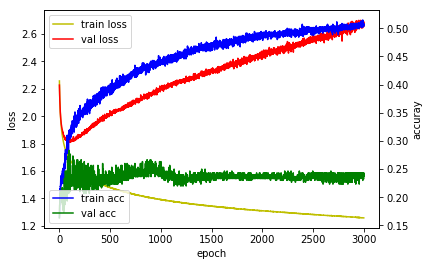

In [16]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [17]:
# 6. 모델 사용하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - ETA: 0s

loss : 2.94597704792
accuray : 0.2594


In [18]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping() # 조기종료 콜백함수 정의
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - ETA: 0s - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/3000
700/700 [==============================] - ETA: 0s - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/3000
700/700 [==============================] - ETA: 0s - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/3000
700/700 [==============================] - ETA: 0s - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/3000
700/700 [==============================] - ETA: 0s - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/3000
700/700 [==============================] - ETA: 0s - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/3000
700/700 [==============================] - ETA: 0s - loss: 2.0719 - acc: 0.2086 - val_loss: 2.0727 - val_acc: 0.2067
Epoch 8/3000
700/700 [======================

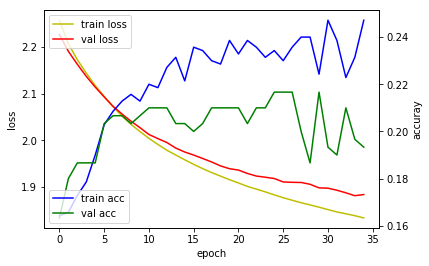

In [19]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [20]:
# 6. 모델 사용하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - ETA: 0s

loss : 1.91097395439
accuray : 0.1994


In [21]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 20) # 조기종료 콜백함수 정의
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - ETA: 0s - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/3000
700/700 [==============================] - ETA: 0s - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/3000
700/700 [==============================] - ETA: 0s - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/3000
700/700 [==============================] - ETA: 0s - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/3000
700/700 [==============================] - ETA: 0s - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/3000
700/700 [==============================] - ETA: 0s - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/3000
700/700 [==============================] - ETA: 0s - loss: 2.0719 - acc: 0.2086 - val_loss: 2.0727 - val_acc: 0.2067
Epoch 8/3000
700/700 [======================

700/700 [==============================] - ETA: 0s - loss: 1.7505 - acc: 0.2857 - val_loss: 1.8299 - val_acc: 0.2000
Epoch 64/3000
700/700 [==============================] - ETA: 0s - loss: 1.7484 - acc: 0.2814 - val_loss: 1.8270 - val_acc: 0.2200
Epoch 65/3000
700/700 [==============================] - ETA: 0s - loss: 1.7457 - acc: 0.2814 - val_loss: 1.8299 - val_acc: 0.2033
Epoch 66/3000
700/700 [==============================] - ETA: 0s - loss: 1.7439 - acc: 0.2800 - val_loss: 1.8297 - val_acc: 0.2067
Epoch 67/3000
700/700 [==============================] - ETA: 0s - loss: 1.7419 - acc: 0.2700 - val_loss: 1.8299 - val_acc: 0.2067
Epoch 68/3000
700/700 [==============================] - ETA: 0s - loss: 1.7405 - acc: 0.2729 - val_loss: 1.8238 - val_acc: 0.2000
Epoch 69/3000
700/700 [==============================] - ETA: 0s - loss: 1.7376 - acc: 0.2814 - val_loss: 1.8298 - val_acc: 0.2167
Epoch 70/3000
700/700 [==============================] - ETA: 0s - loss: 1.7356 - acc: 0.2857 - v

700/700 [==============================] - ETA: 0s - loss: 1.6608 - acc: 0.3257 - val_loss: 1.8218 - val_acc: 0.2333


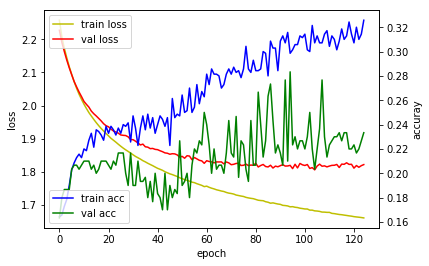

In [22]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [23]:
# 6. 모델 사용하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - ETA: 0s

loss : 1.8419726757
accuray : 0.2717
